# Data Cleaning

In [56]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from scipy.stats import skew, skewtest, pearsonr, spearmanr, normaltest, levene, norm, t, ttest_ind
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import copy

### For Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
%%time
train_transaction = pd.read_csv('/content/drive/MyDrive/dataset-ta/train_transaction.csv', index_col='TransactionID')
test_transaction = pd.read_csv('/content/drive/MyDrive/dataset-ta/test_transaction.csv', index_col='TransactionID')
train_identity = pd.read_csv('/content/drive/MyDrive/dataset-ta/train_identity.csv', index_col='TransactionID')
test_identity = pd.read_csv('/content/drive/MyDrive/dataset-ta/test_identity.csv', index_col='TransactionID')

In [ ]:
!ls -la

In [23]:
%%time 
train_data = pd.read_pickle("merged_train.pkl")
test_data = pd.read_pickle("merged_test.pkl")

CPU times: user 1.57 s, sys: 3.03 s, total: 4.6 s
Wall time: 5.71 s


In [3]:
train_data.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1

In [4]:
test_data.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0

In [5]:
train_data.shape

(590540, 433)

## Utility Functions

In [6]:
def cat_num_features(df):
    
    '''
        Get the names of Categorical Features and 
        Numerical Features of the given Dataset.
    '''
    
    catf = []
    numf = []
    
    # Given Categorical Features 
    catf = ['ProductCD', 
            'card1', 'card2', 'card3', 'card4', 'card5','card6', 
            'addr1', 'addr2', 
            'P_emaildomain', 'R_emaildomain', 
            'M1', 'M2','M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
            'DeviceType', 'DeviceInfo'
           ]
    catf+=['id_'+str(i) for i in range(12,39)]


    # Updating the Categorical Feature Names List based on the columns present in the dataframe
    catf = [feature for feature in catf if feature in df.columns.values]
    numf = [feature for feature in df.columns if feature not in catf and not feature == 'isFraud']
    
    return (catf, numf)

In [13]:
def one_hot_encoding(X_train, X_test, catf):
  '''
    Encode categorical features using one hot encoding
  '''

  ohe = OneHotEncoder(handle_unknown='ignore')
  X_train_trf = pd.DataFrame(ohe.fit_transform(X_train).toarray(), columns=ohe.get_feature_names_out(X_train[catf]))
  X_test_trf = pd.DataFrame(ohe.fit_transform(X_test).toarray(), columns=ohe.get_feature_names_out(X_test[catf]))

  return (X_train_trf, X_test_trf)


In [8]:
def apply_ordinal_encoding(train_data, test_data, categorical_features):
    '''
    Apply ordinal encoding to categorical features in train and test data
    '''
    # Initialize the encoder
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
    
    # Fit the encoder on the train data
    encoder.fit(train_data[categorical_features])
    
    # Transform the train and test data using the encoder
    train_data_encoded = train_data.copy()
    train_data_encoded[categorical_features] = encoder.transform(train_data[categorical_features])
    
    test_data_encoded = test_data.copy()
    test_data_encoded[categorical_features] = encoder.transform(test_data[categorical_features])
    
    return train_data_encoded, test_data_encoded


In [9]:
def compute_vif(df, features):
    
    '''
        Utility Function to compute Variance Inflation Factor for given features in a dataframe.
    '''
    
    data = df[features]
    vif = {column:variance_inflation_factor(data.values, idx) for idx, column in enumerate(features)}
    return vif

In [10]:
def remove_feature_based_on_vif(train_df, vif_dict):
    
    '''
        Utility Function to remove the feature based on vif value from train and test set and return 
        the updated list of features among which VIF is being computed.
        
        Those features which have the vif value >= 10 will be continuosly 
        removed one by one until no such feature is left.  
    '''

    features_to_be_discarded = []

    train = copy.deepcopy(train_df)
    rf = max(vif_dict, key=vif_dict.get) # Getting the feature with max vif value
    thr = vif_dict[rf] # Storing the vif value of that feature
    
    # Checking if the largest vif value if greater than or equal to 10
    while(thr>=10):
        features_to_be_discarded.append(rf) 
        vif_dict.pop(rf) # Removing the feature and its vif value from the vif dictionary
        features = list(vif_dict.keys()) # Updated list of features
        train = train_df.drop(columns=rf, axis=1) # Removing the feature from train dataset
        if(len(features)==1):
            break # break if only one feature remains 
        
        vif_dict = compute_vif(train, features) # Recomputing the VIF values
        rf = max(vif_dict, key=vif_dict.get) 
        thr = vif_dict[rf]
      
    del train
        
        
    return features_to_be_discarded

In [29]:
def drop_by_spearman(train_df, thresh):
    feature_comb = itertools.combinations(train_df.columns, 2)
    neg_thresh = -1 * thresh
    drop = []
    for a, b in feature_comb:
        coef, pvalue = spearmanr(train_df[a], train_df[b])
        if pvalue < 0.05:
            if coef > thresh:
                drop.append(b)
            elif coef < neg_thresh:
                drop.append(b)
                
    return list(set(drop))

In [12]:
def feature_selection_rf(X, y, n_estimators=100, max_features='sqrt', random_state=None):
    """
    Performs feature selection using a random forest classifier.

    Parameters:
    - X: pandas DataFrame or numpy array, shape (n_samples, n_features)
        The input data.
    - y: pandas Series or numpy array, shape (n_samples,)
        The target labels.
    - n_estimators: int, default=100
        The number of trees in the random forest.
    - max_features: int, float, or {'auto', 'sqrt', 'log2'}, default='sqrt'
        The number of features to consider when splitting a node:
        - If int, then consider max_features features at each split.
        - If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
        - If 'auto', then max_features=sqrt(n_features).
        - If 'sqrt', then max_features=sqrt(n_features).
        - If 'log2', then max_features=log2(n_features).
    - random_state: int or None, default=None
        The random state to use for reproducibility.

    Returns:
    - X_selected: pandas DataFrame or numpy array, shape (n_samples, n_selected_features)
        The input data with only the selected features.
    - feature_indices: list of int
        The indices of the selected features.
    """
    # Train a random forest classifier on the data
    rf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=random_state)
    rf.fit(X, y)
    
    # Use the trained random forest to select features
    selector = SelectFromModel(rf, prefit=True)
    X_selected = selector.transform(X)
    feature_indices = selector.get_support(indices=True)
    
    return X_selected, feature_indices


In [19]:
def backward_feature_selection_ann(X_train, y_train):
    # Assume X_train and y_train are your input and output data, respectively

    # Define a neural network with all the features
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(loss='mse', optimizer='adam')

    # Train the network with all the features
    model.fit(X_train, y_train, validation_split=0.2, epochs=10)

    # Evaluate the performance of the network
    val_loss, val_acc = model.evaluate(X_val, y_val)

    # Perform backward feature selection
    n_features = X_train.shape[1]
    features = np.arange(n_features)
    best_features = features

    while len(best_features) > 1:
        best_loss = val_loss
        for feature in features:
            # Remove one feature
            subset = best_features[best_features != feature]
            X_train_subset = X_train[:, subset]
            X_val_subset = X_val[:, subset]

            # Train the network with the subset of features
            model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_subset.shape[1],)),
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(1)
            ])
            model.compile(loss='mse', optimizer='adam')
            model.fit(X_train_subset, y_train, validation_split=0.2, epochs=10, verbose=0)

            # Evaluate the performance of the network
            loss, acc = model.evaluate(X_val_subset, y_val, verbose=0)

            # Update the best features if the performance improved
            if loss < best_loss:
                best_loss = loss
                best_features = subset

        # Stop if no improvement was made
        if set(best_features) == set(features):
            break

    print(best_features)


In [30]:
def missing_info(column, df):
    
    '''
        Utility Function to compute the missing value info
        of any feature in a dataset.
    '''
    
    na = df[column].isna()
    count = na.sum()
    total_count = df.shape[0]
    miss_prcnt = np.round((count/total_count)*100,3)
    
    return (count, miss_prcnt)

In [31]:
def show_stats_numeric(data_col):
  print("Number of data: {}".format(len(data_col)))
  print("Mean: {}".format(data_col.mean()))
  print("Max: {}".format(data_col.max()))
  print("Min: {}".format(data_col.min()))
  print("Q1: {}".format(np.percentile(data_col, 25)))
  print("Q2: {}".format(np.percentile(data_col, 50)))
  print("Q3: {}".format(np.percentile(data_col, 75)))

In [32]:
def missing_train_info(df):
    '''
        Utility Function to get information about missing values in the dataframe, 
        for each column the following information is given by this function.
       
            - Number of missing values present in the column.
            - Percentage of missing values in the column.
    '''
    
    columns_missing_info = []
    
    for column in df:

        count, miss_prcnt = missing_info(column, df);
        
        if(count):
            columns_missing_info.append([column, count, miss_prcnt])
      
    column_names = ['Feature_Name', 'Missing_Count', 'Missing_Percentage']
    
    missing_info_df = pd.DataFrame(data = columns_missing_info, columns = column_names)
    
    return missing_info_df

In [13]:
# https://www.kaggle.com/cdeotte/eda-for-columns-v-and-id

def reduce_group(grps):
    '''
    Utility tool to reduce groups, by selecting the feature that holds the maximum unique values
    '''
    global train_data
    chosen = []
    for parent, children in grps.items():
      max_unique = train_data[parent].nunique(); max_unique_child = parent
      for child in children:
        n = train_data[child].nunique()
        if n>max_unique:
            max_unique = n
            max_unique_child = child
      chosen.append(max_unique_child)

    print('Use these', chosen)

    return chosen

## Numerical Features

In [14]:
# Storing categorical and numerical features

catf, numf = cat_num_features(train_data)

In [15]:
print('Number of categorical features: ' + str(len(catf)))
print('Number of numerical features: ' + str(len(numf)))

Number of categorical features: 49
Number of numerical features: 383


### Removing Redundant Features

Akan dilakukan penghapusan fitur untuk fitur yang

*   Memiliki >90% missing values
*   Memiliki value yang konstan untuk setiap baris
*   Memiliki >90% value yang sama





In [16]:
# Removing redundant features

null_90_train = [f for f in train_data.columns if train_data[f].isna().sum()/len(train_data) > 0.9]
null_90_test = [f for f in test_data.columns if test_data[f].isna().sum()/len(test_data) > 0.9]

one_value_features_train = [f for f in train_data.columns if train_data[f].nunique()<=1]
one_value_features_test = [f for f in test_data.columns if test_data[f].nunique()<=1]

constant_value_features_train = [f for f in train_data.columns if train_data[f].value_counts(dropna=False, normalize=True).values[0] > 0.9]
constant_value_features_test = [f for f in test_data.columns if test_data[f].value_counts(dropna=False, normalize=True).values[0] > 0.9]

In [24]:
drop_cols = list(set(null_90_train + null_90_test + one_value_features_train + one_value_features_test + constant_value_features_train + constant_value_features_test))

if 'isFraud' in drop_cols:
  # exclude target feature
  drop_cols.remove('isFraud')

train_data_rdc = train_data.drop(drop_cols, axis=1)
test_data_rdc = test_data.drop(drop_cols, axis=1)

In [25]:
catf, numf = cat_num_features(train_data_rdc)
cat_features_indices = [train_data_rdc.columns.get_loc(f) for f in catf]

In [26]:
print('Number of categorical features after removal: ' + str(len(catf)))
print('Number of numerical features after removal: ' + str(len(numf)))

Number of categorical features after removal: 41
Number of numerical features after removal: 309


In [ ]:
catf

In [ ]:
numf

## Checking Multicolinearity

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results when a researcher or analyst attempts to determine how well each independent variable can be used most effectively to predict or understand the dependent variable in a statistical model.

### C Features

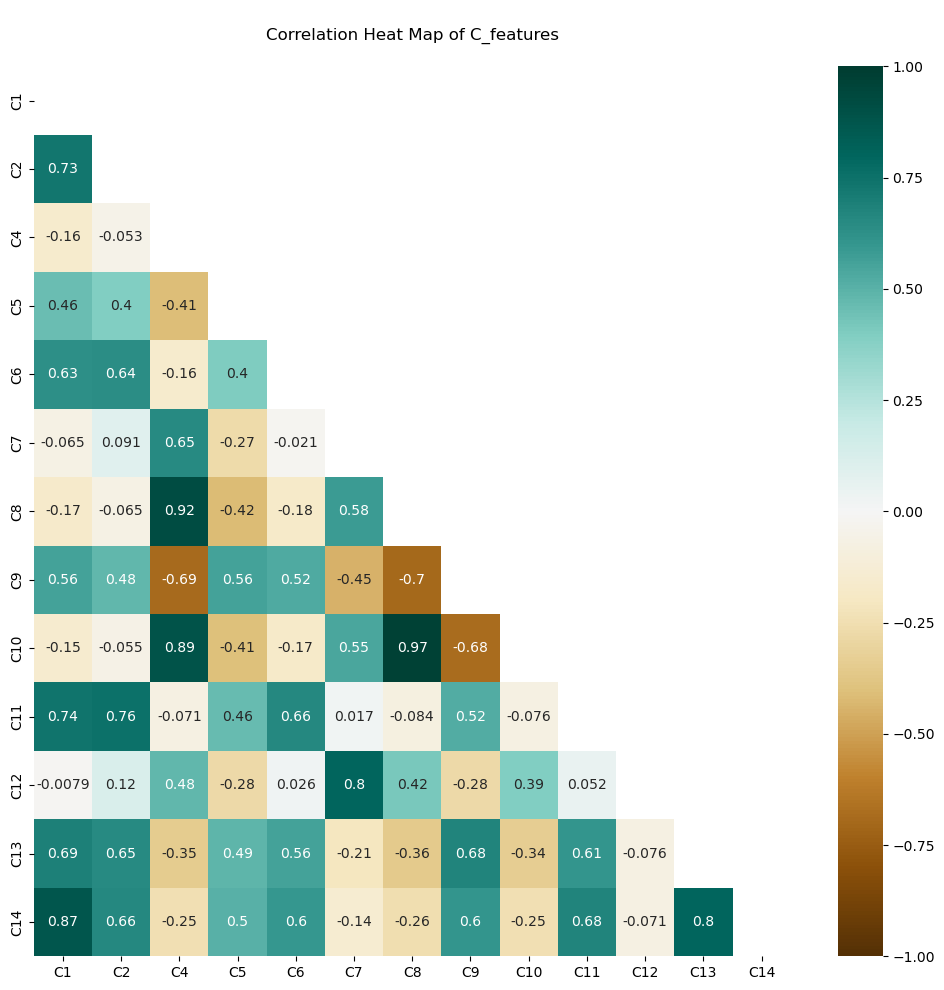

In [27]:
c_features = ["C"+str(i) for i in range(1,15) if "C"+str(i) in train_data_rdc.columns]

plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(train_data_rdc[c_features].corr(), dtype=bool))
sns.color_palette("crest", as_cmap=True)
sns.heatmap(train_data_rdc[c_features].corr(method='spearman'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');
plt.title('\nCorrelation Heat Map of C_features\n')
plt.tight_layout()
plt.show()

Removing features using Spearman, with 0.9 threshold

In [33]:
drop_c = drop_by_spearman(train_data_rdc[c_features], 0.9)
drop_c

['C8', 'C10']

In [34]:
train_data_rdc.drop(drop_c, axis=1, inplace=True)
test_data_rdc.drop(drop_c, axis=1, inplace=True)

### D Features

<Figure size 1000x1000 with 0 Axes>

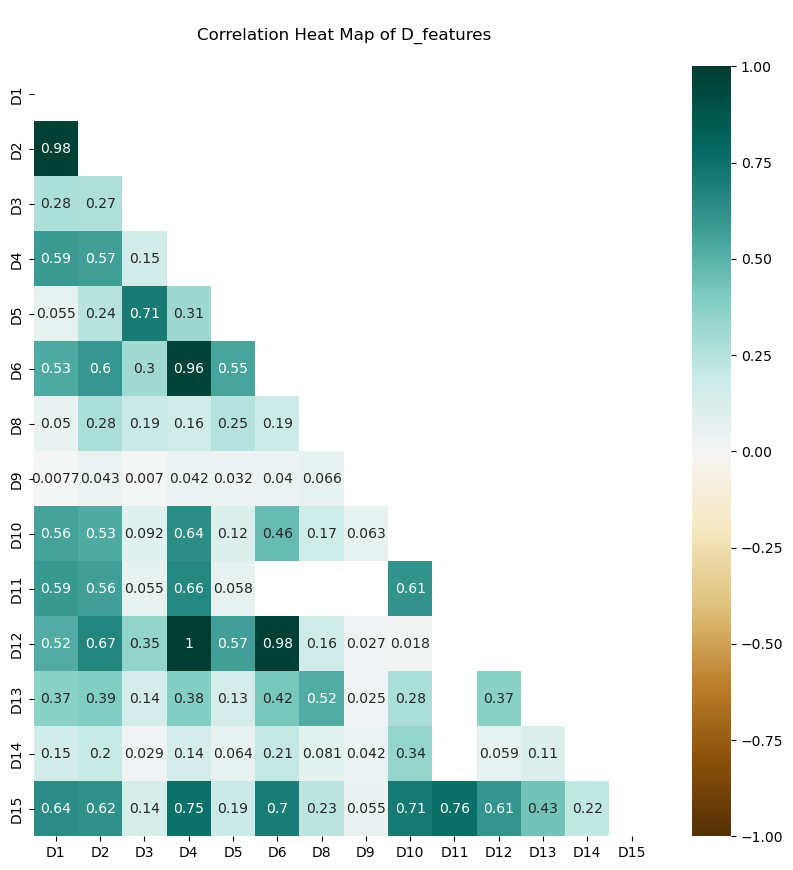

In [35]:
d_features = ["D"+str(i) for i in range(1,16) if "D"+str(i) in train_data_rdc.columns]

plt.figure(figsize=(10,10))

mask = np.triu(np.ones_like(train_data_rdc[d_features].corr(), dtype=bool))
plt.figure(figsize=(10,10))
sns.color_palette("crest", as_cmap=True)
sns.heatmap(train_data_rdc[d_features].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');
plt.title('\nCorrelation Heat Map of D_features\n')
plt.show()

In [36]:
drop_d = drop_by_spearman(train_data[d_features], 0.9)
drop_d

[]

### id numerical features

In [37]:
id_num_features = ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11']
id_num_features = [f for f in id_num_features if f in train_data_rdc.columns]

<Figure size 1000x1000 with 0 Axes>

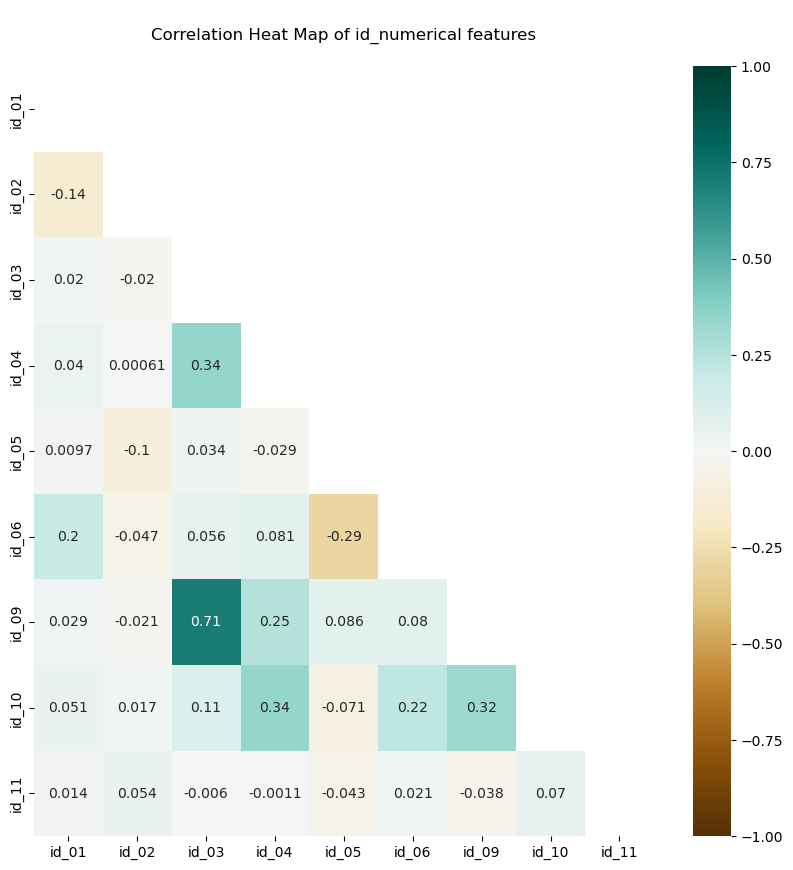

In [38]:
plt.figure(figsize=(10,10))

mask = np.triu(np.ones_like(train_data_rdc[id_num_features].corr(), dtype=bool))
plt.figure(figsize=(10,10))
sns.color_palette("crest", as_cmap=True)
sns.heatmap(train_data_rdc[id_num_features].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');
plt.title('\nCorrelation Heat Map of id_numerical features\n')
plt.show()

In [39]:
drop_id = drop_by_spearman(train_data_rdc[id_num_features], 0.9)
drop_id

[]

### V_features

In [41]:
v_features = ["V"+str(i) for i in range(1,340) if "V"+str(i) in train_data_rdc.columns]

In [42]:
v_feat_missing = missing_train_info(train_data_rdc[v_features])
v_feat_missing

,Feature_Name,Missing_Count,Missing_Percentage
0,V1,279287,47.293
1,V2,279287,47.293
2,V3,279287,47.293
3,V4,279287,47.293
4,V5,279287,47.293
5,V6,279287,47.293
6,V7,279287,47.293
7,V8,279287,47.293
8,V9,279287,47.293
9,V10,279287,47.293


V_features have interesting subgroups, features with same number of missing values should be considered as one group

In [43]:
# Based on the EDA V_features can be divided into groups with same number of missig values.

v_grps = {}

for key, val in train_data_rdc[v_features].isna().sum().items():
  if(v_grps.get(val, -1)==-1):
    v_grps[val] = [key]
  else:
    v_grps[val].append(key) 
    
v_grps

{279287: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'],
 76073: ['V12',
  'V13',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V29',
  'V30',
  'V31',
  'V32',
  'V33',
  'V34'],
 168969: ['V35',
  'V36',
  'V37',
  'V38',
  'V39',
  'V40',
  'V41',
  'V42',
  'V43',
  'V44',
  'V45',
  'V46',
  'V47',
  'V48',
  'V49',
  'V50',
  'V51',
  'V52'],
 77096: ['V53',
  'V54',
  'V56',
  'V57',
  'V58',
  'V59',
  'V60',
  'V61',
  'V62',
  'V63',
  'V64',
  'V69',
  'V70',
  'V71',
  'V72',
  'V73',
  'V74'],
 89164: ['V75',
  'V76',
  'V78',
  'V79',
  'V80',
  'V81',
  'V82',
  'V83',
  'V84',
  'V85',
  'V87',
  'V90',
  'V91',
  'V92',
  'V93',
  'V94'],
 314: ['V95',
  'V96',
  'V97',
  'V99',
  'V100',
  'V126',
  'V127',
  'V128',
  'V130',
  'V131'],
 508595: ['V138',
  'V139',
  'V140',
  'V141',
  'V142',
  'V146',
  'V147',
  'V148',
  'V149',
  'V153',
  'V154',
  'V155',
  'V156',
  'V157',
  'V158',
  'V161',
  'V162',
  'V1

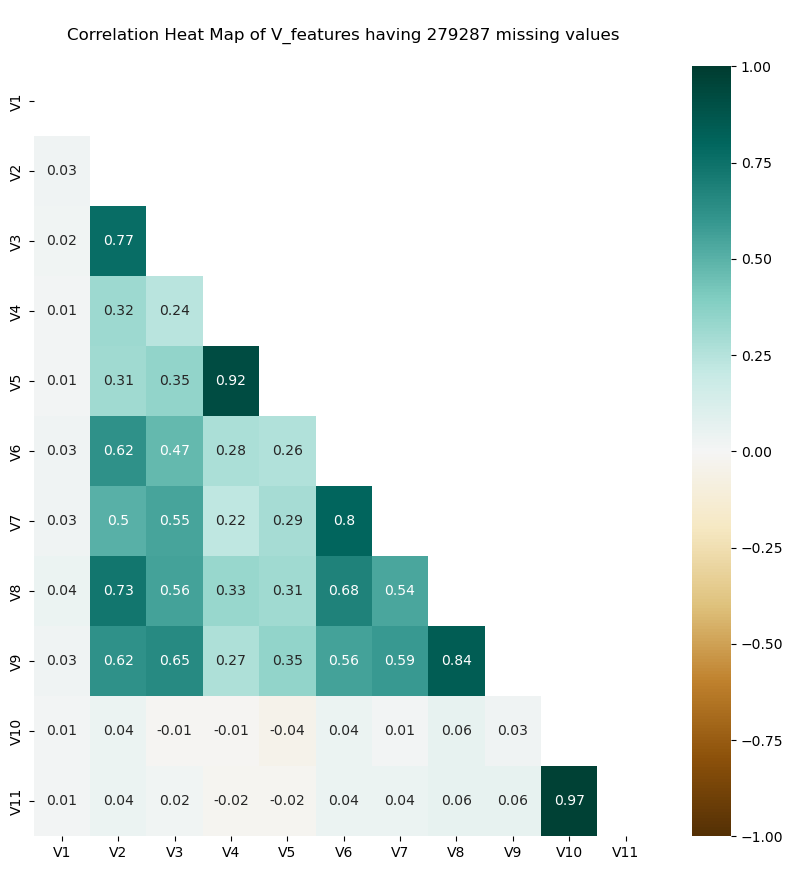

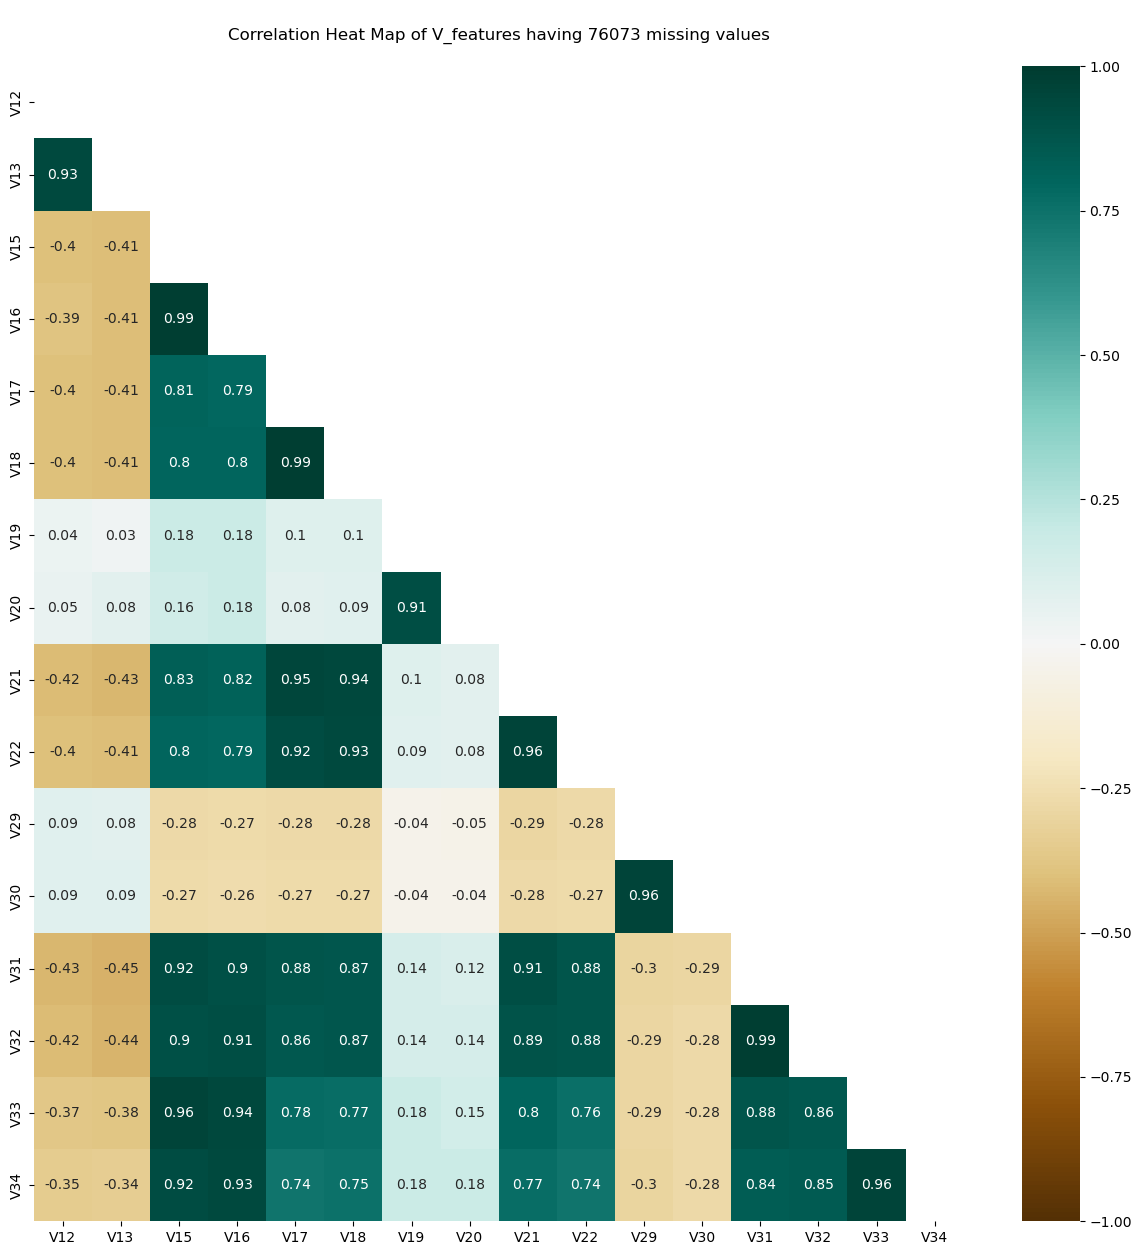

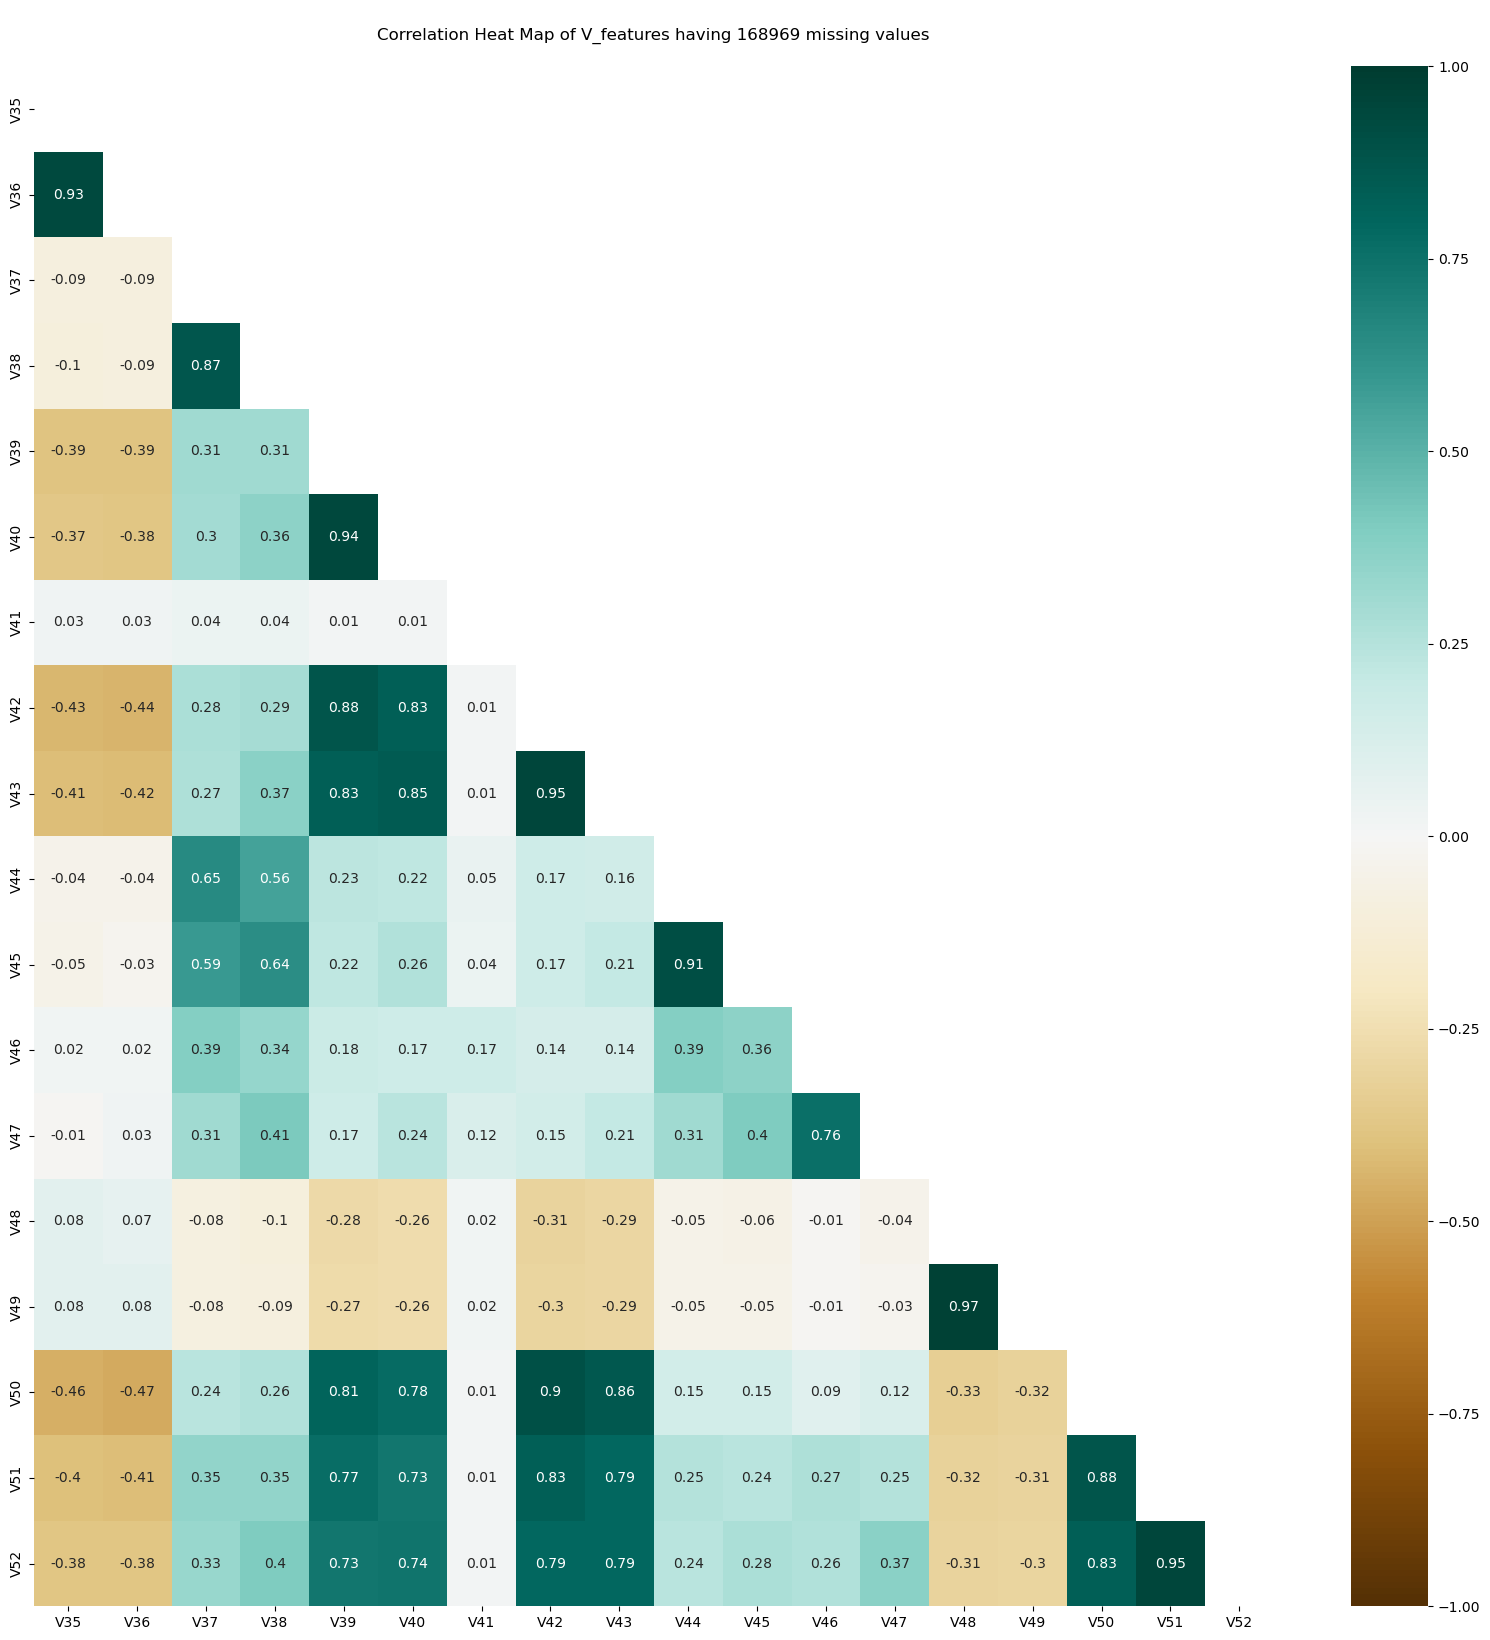

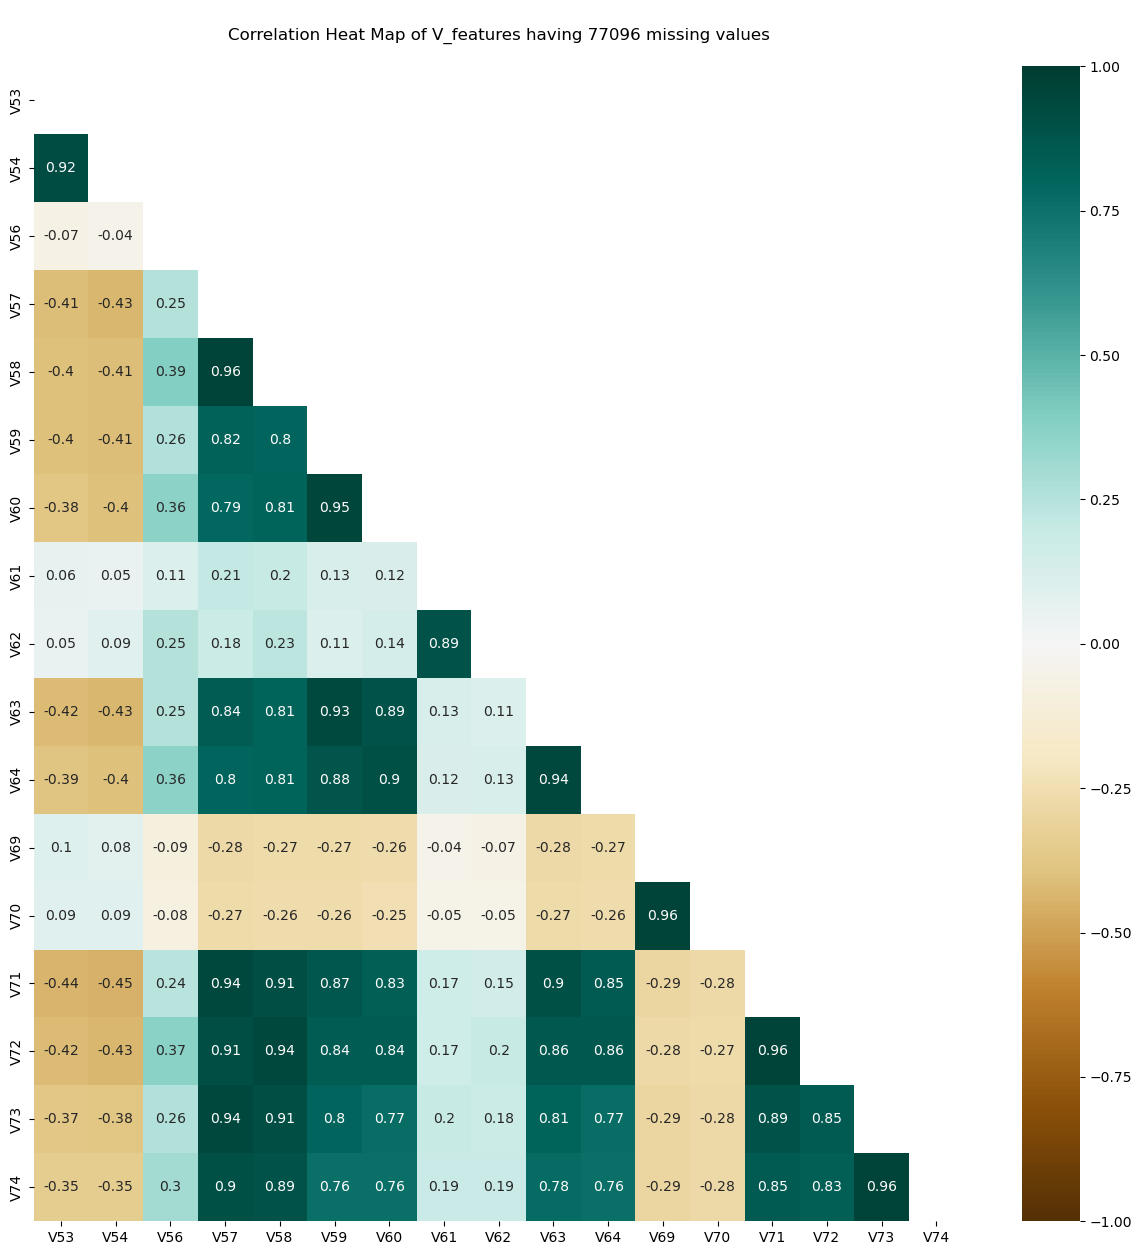

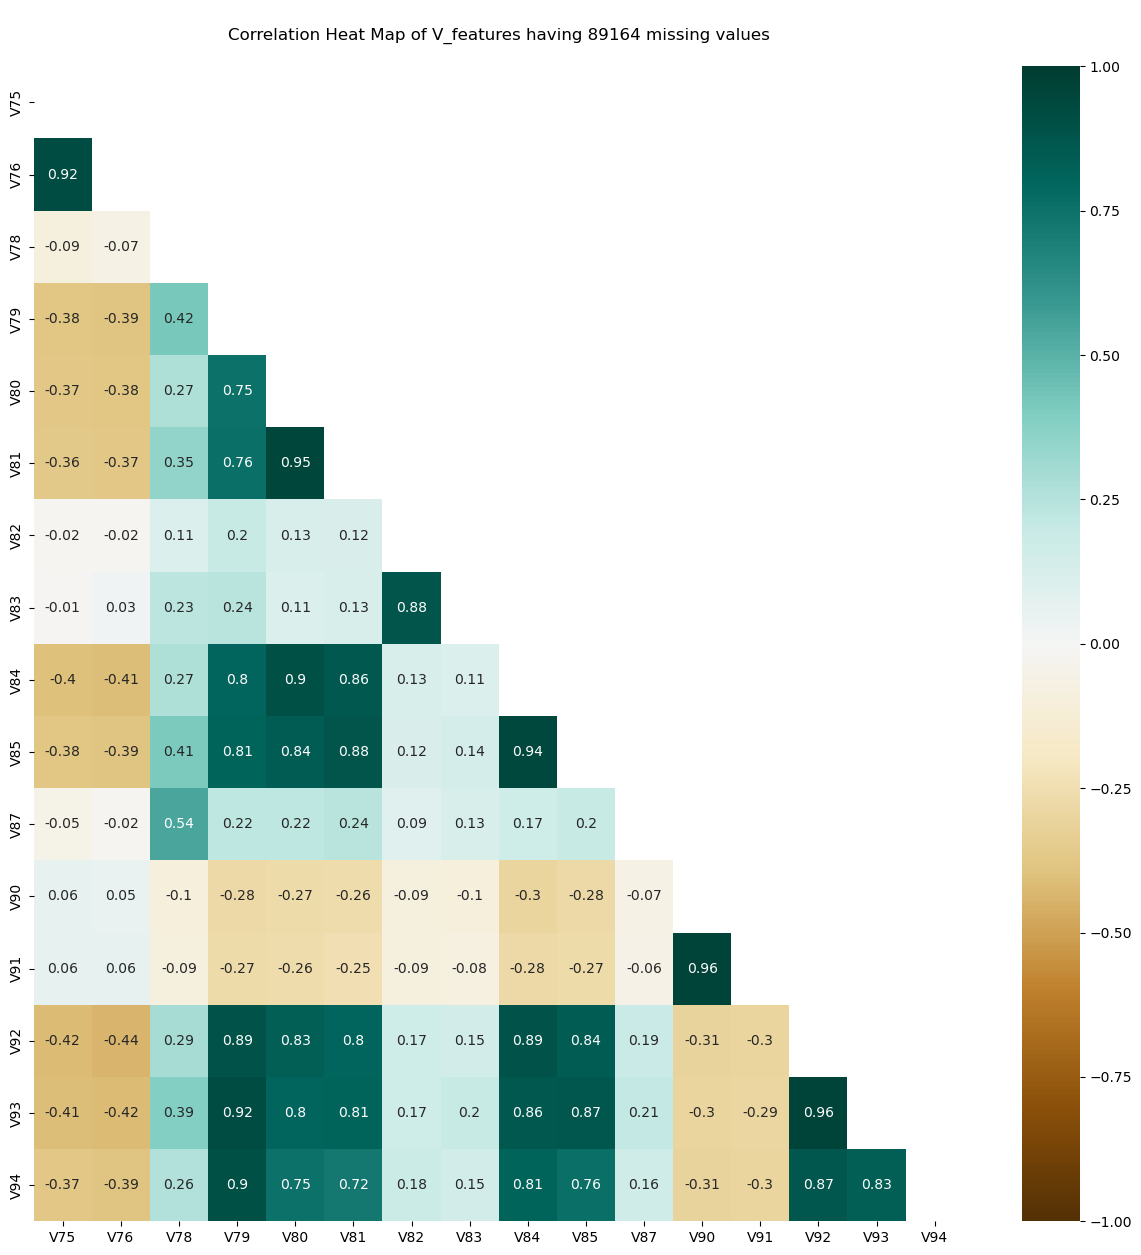

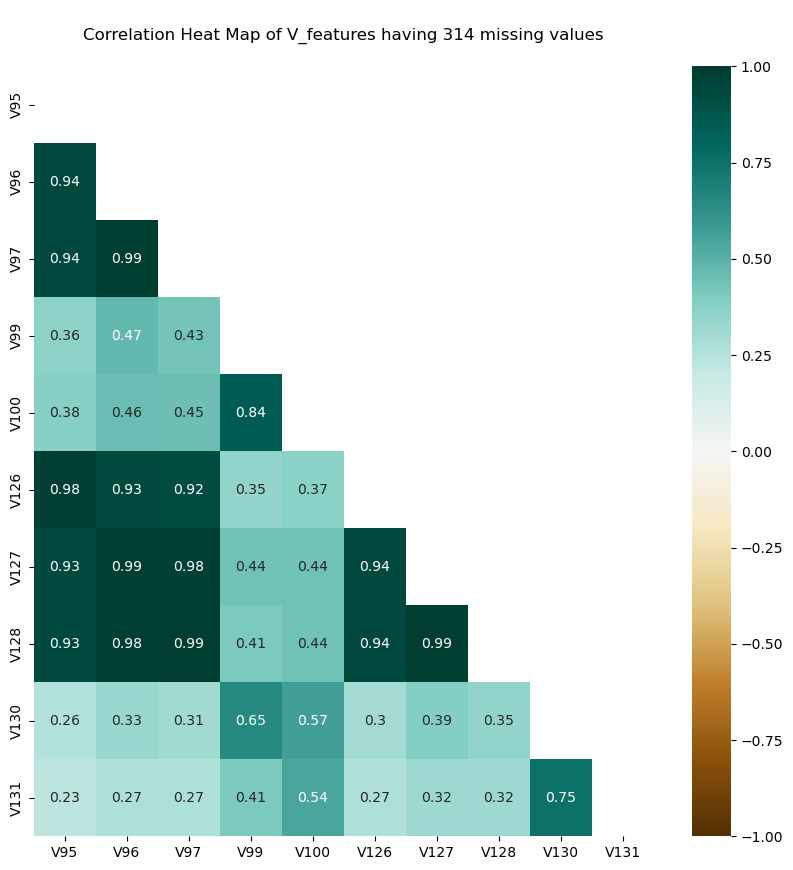

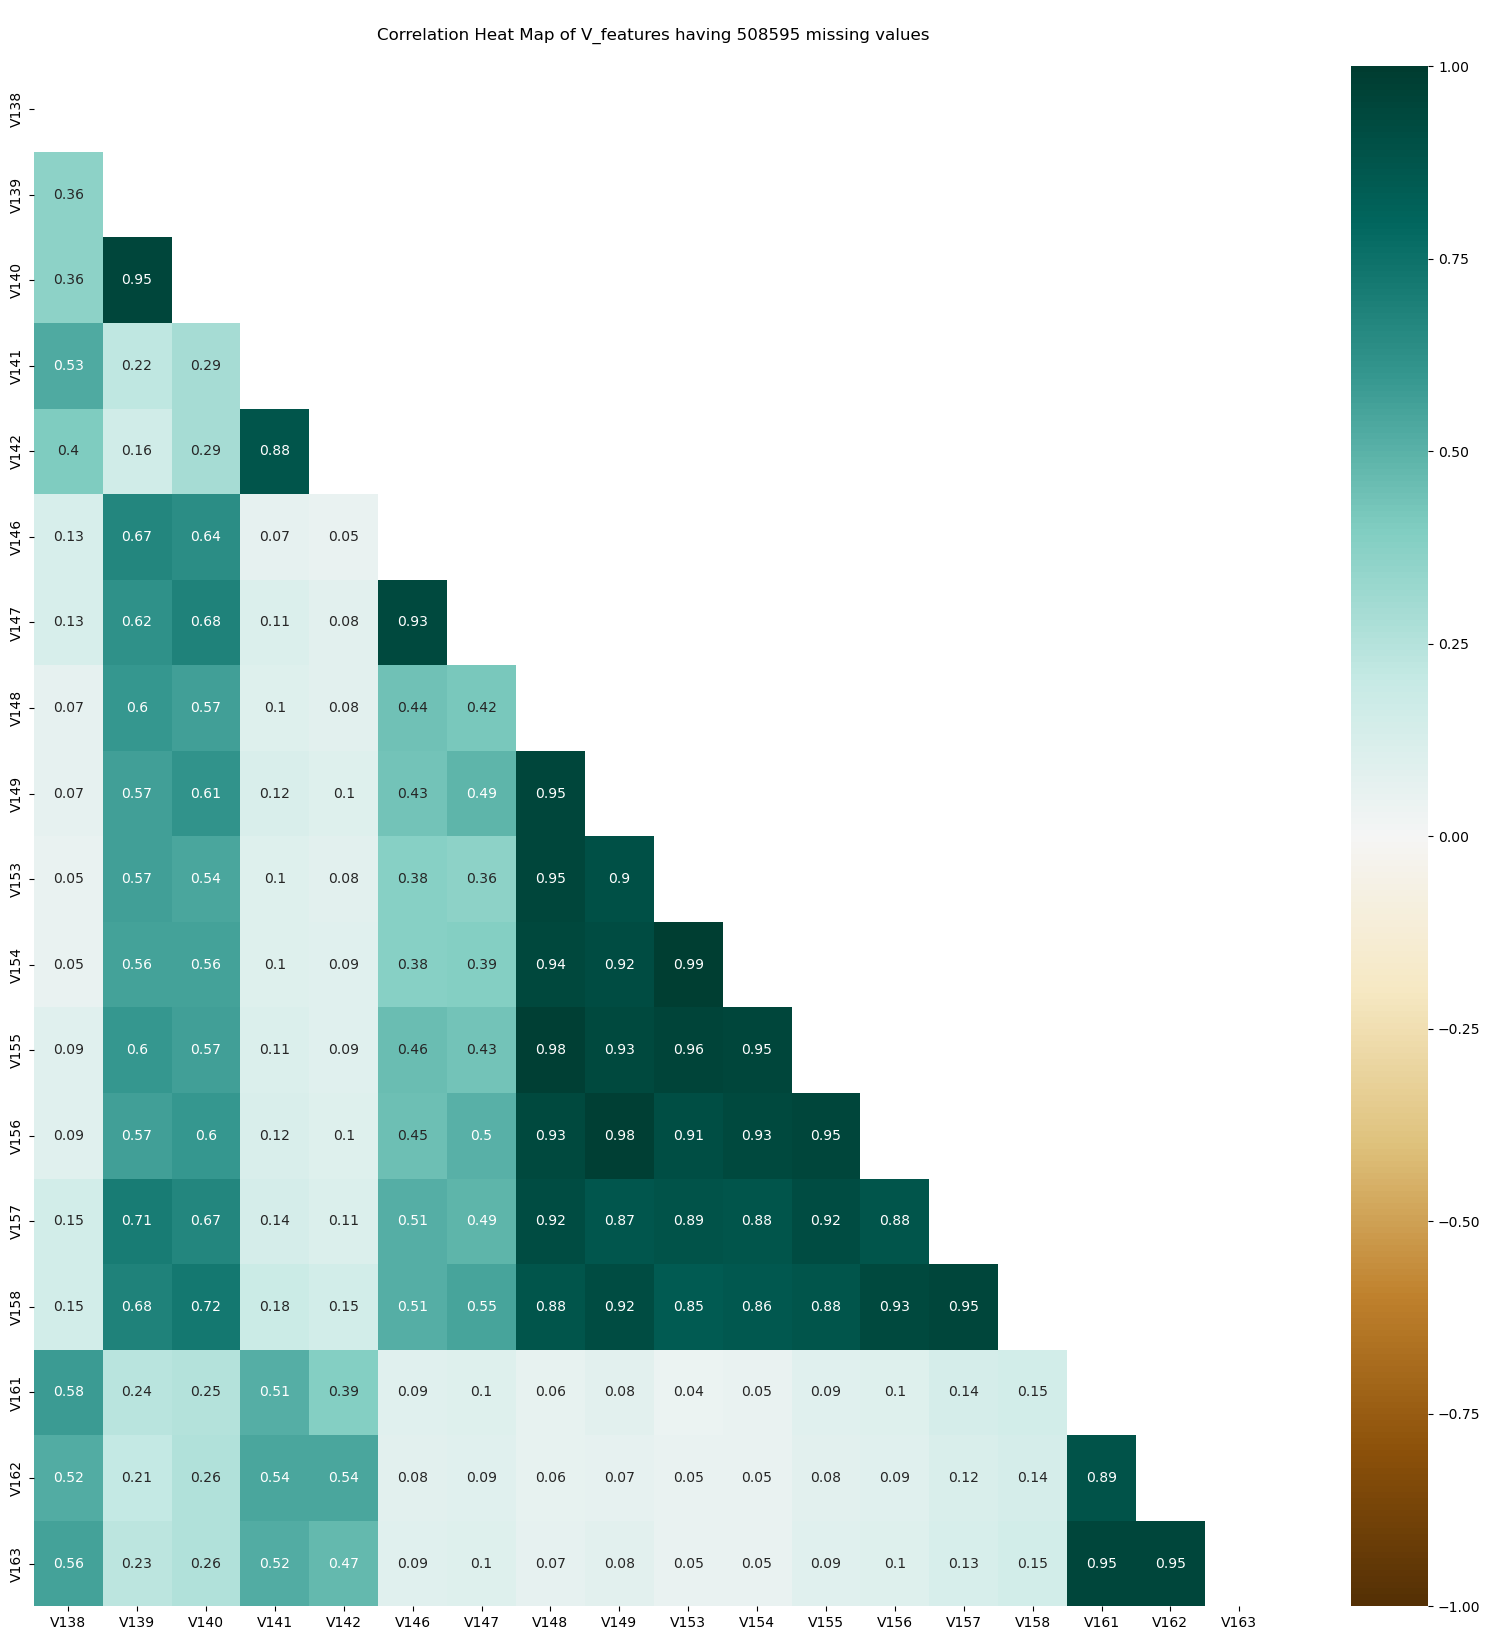

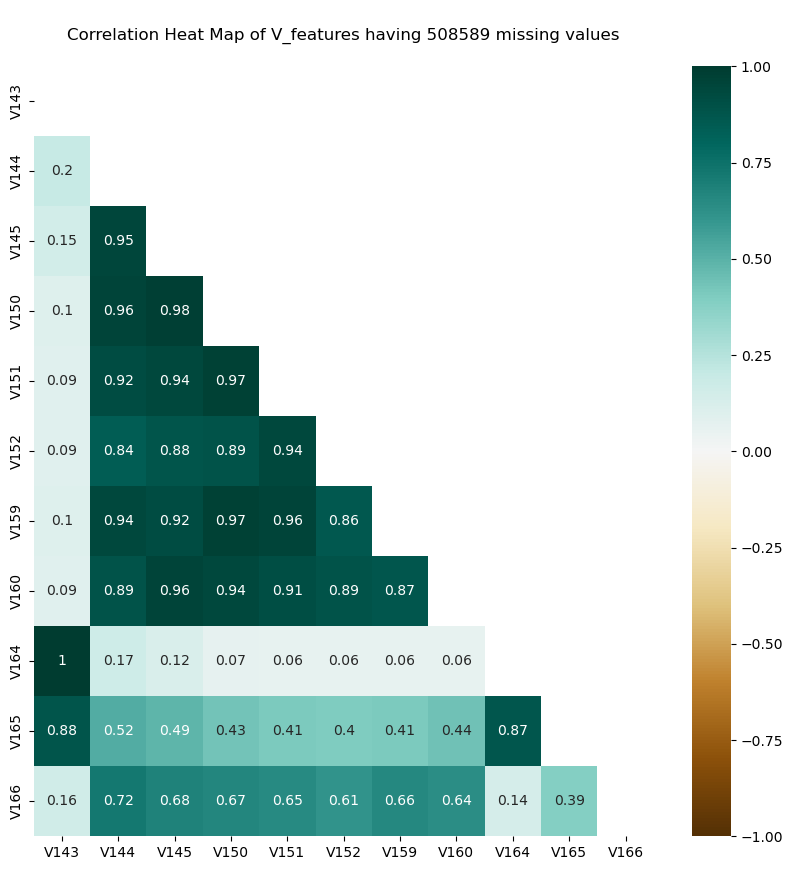

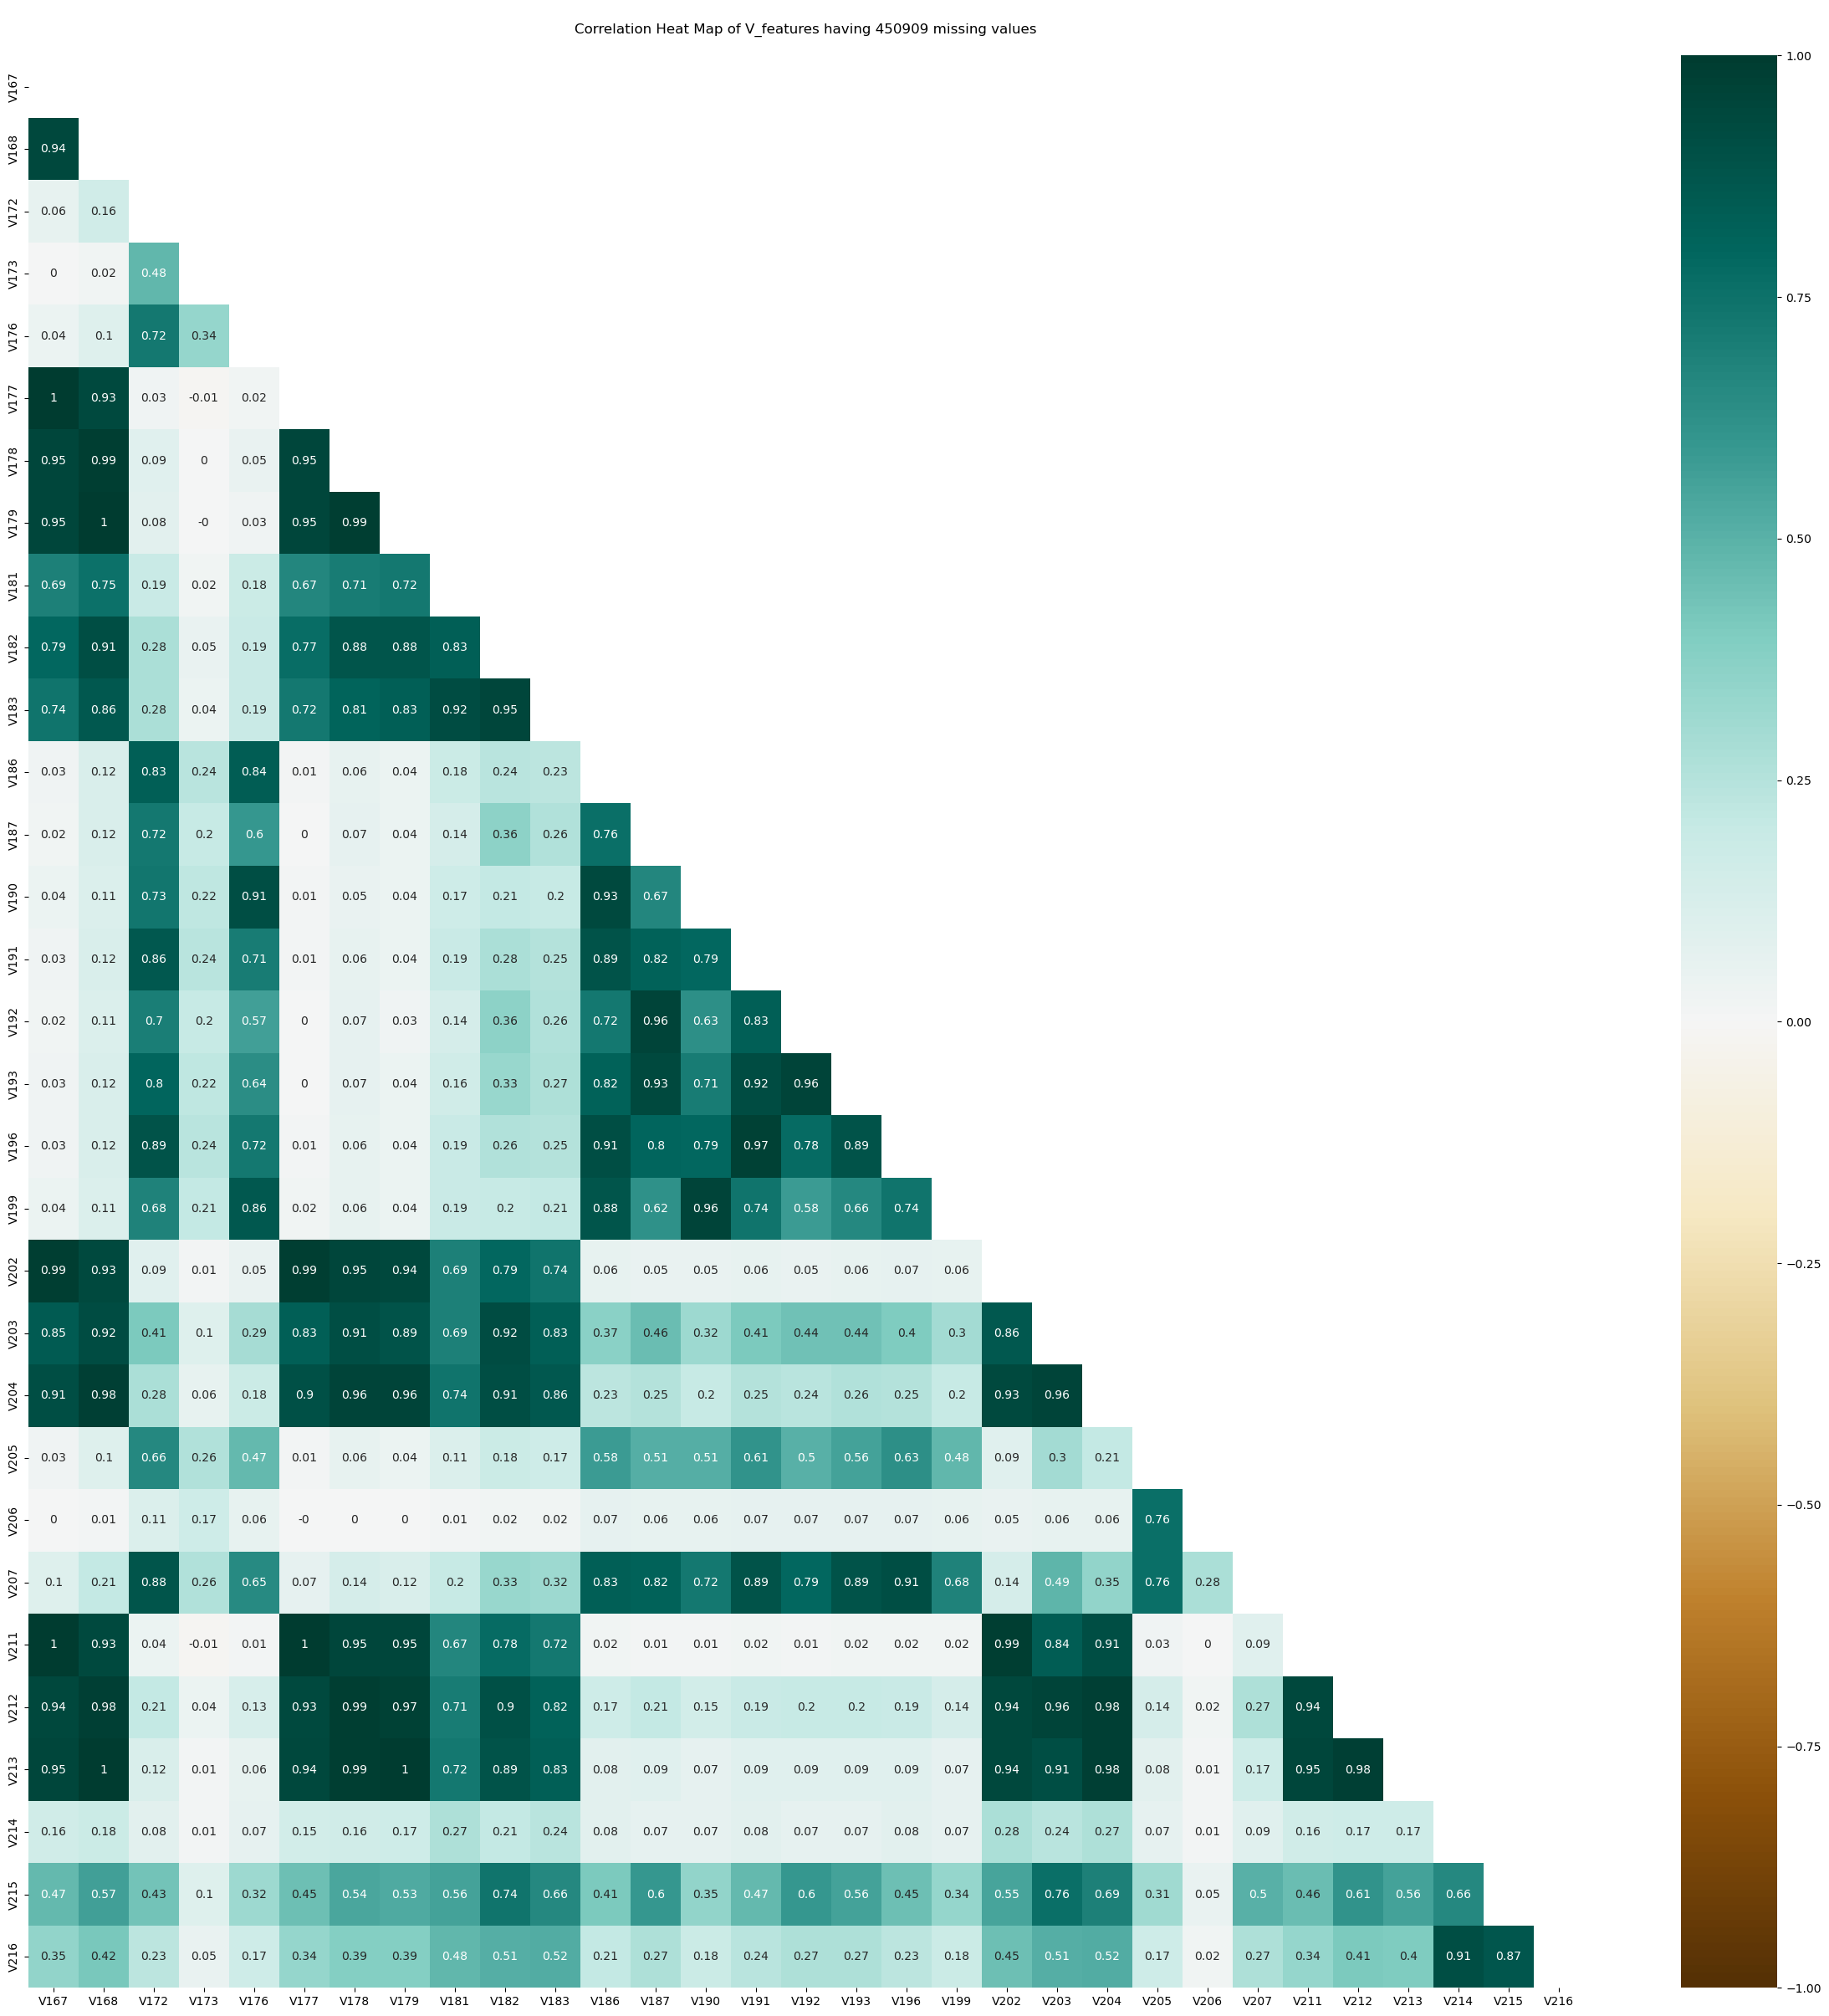

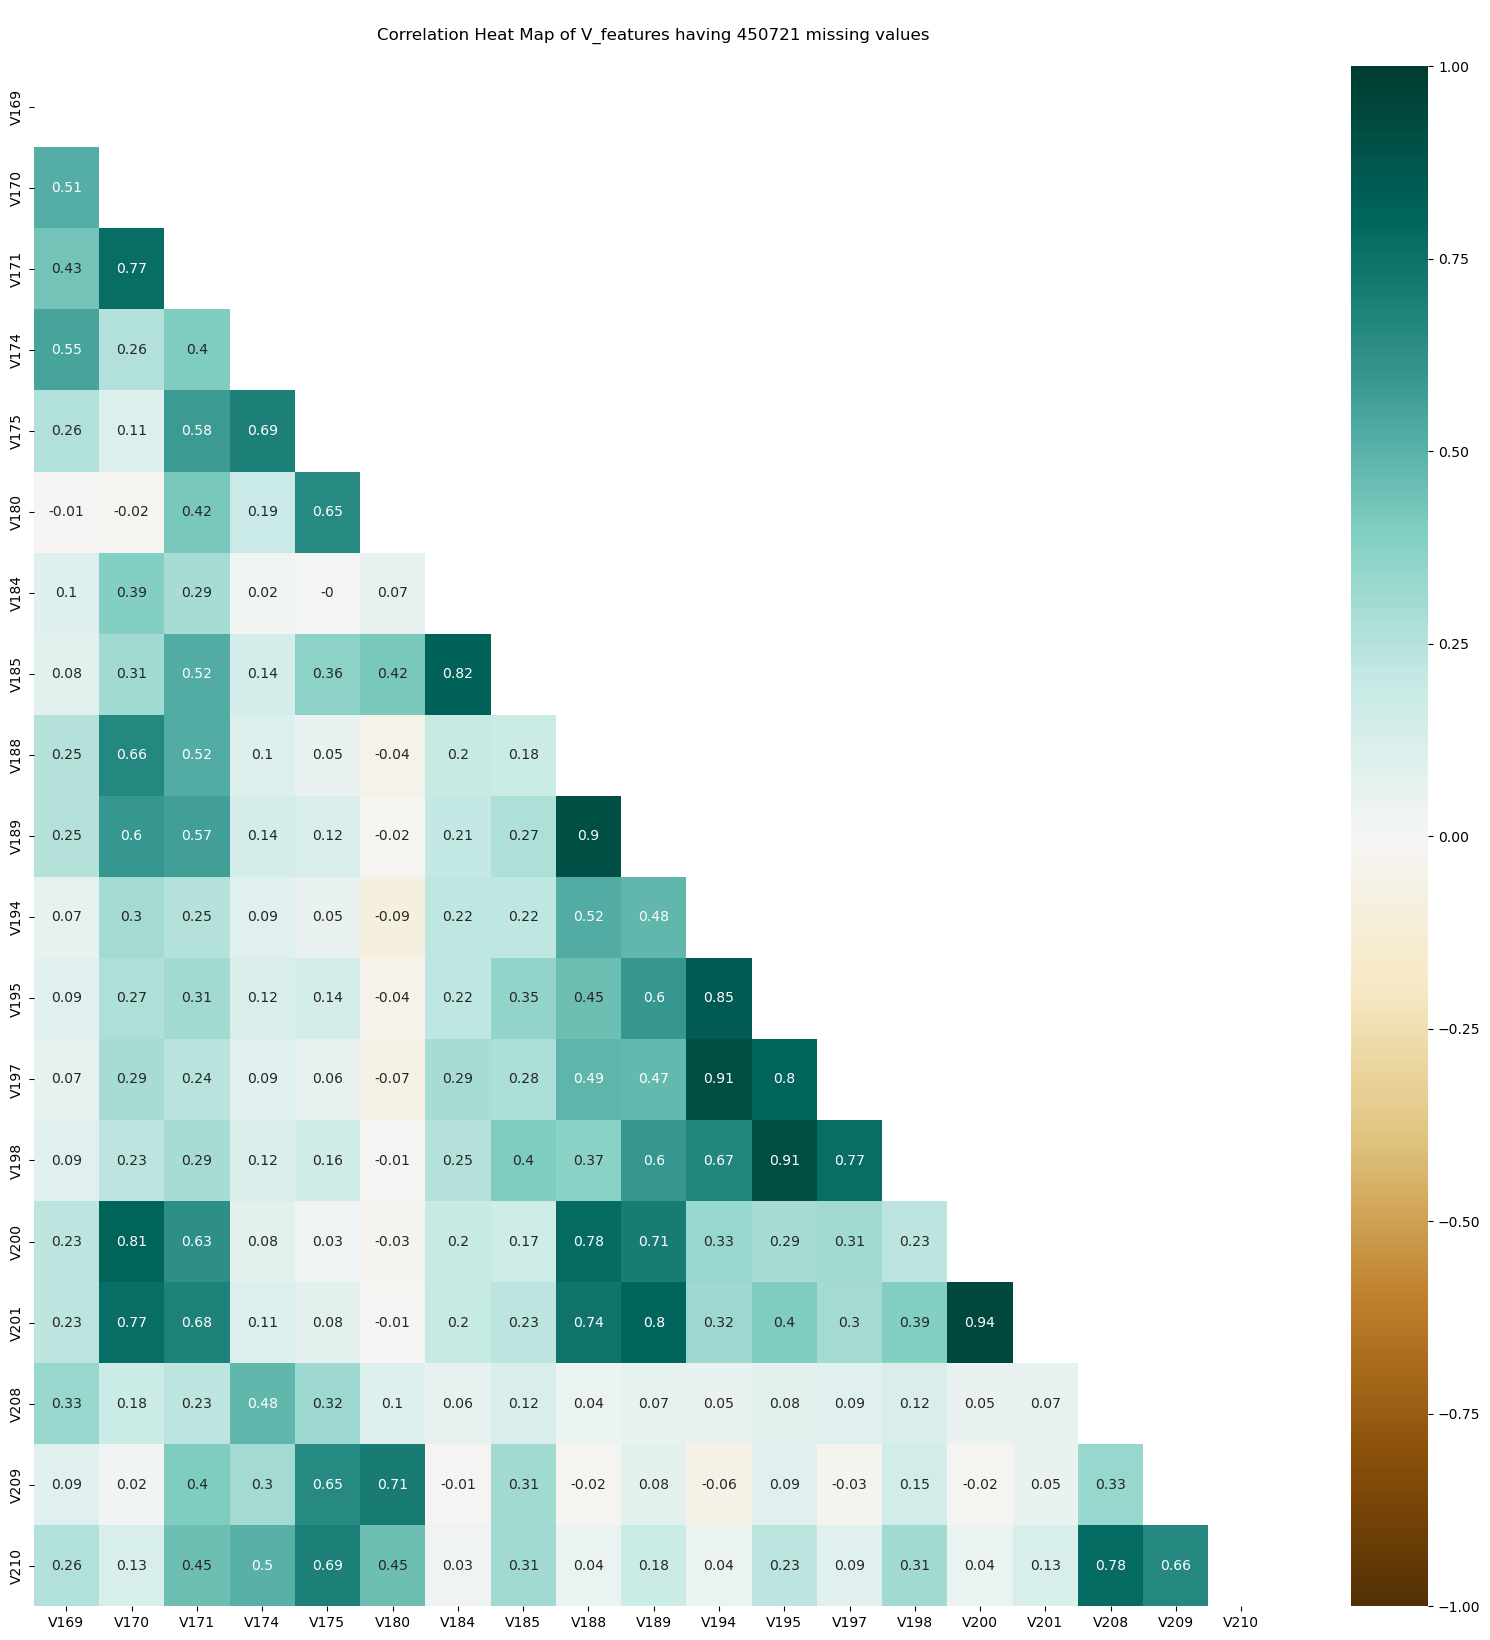

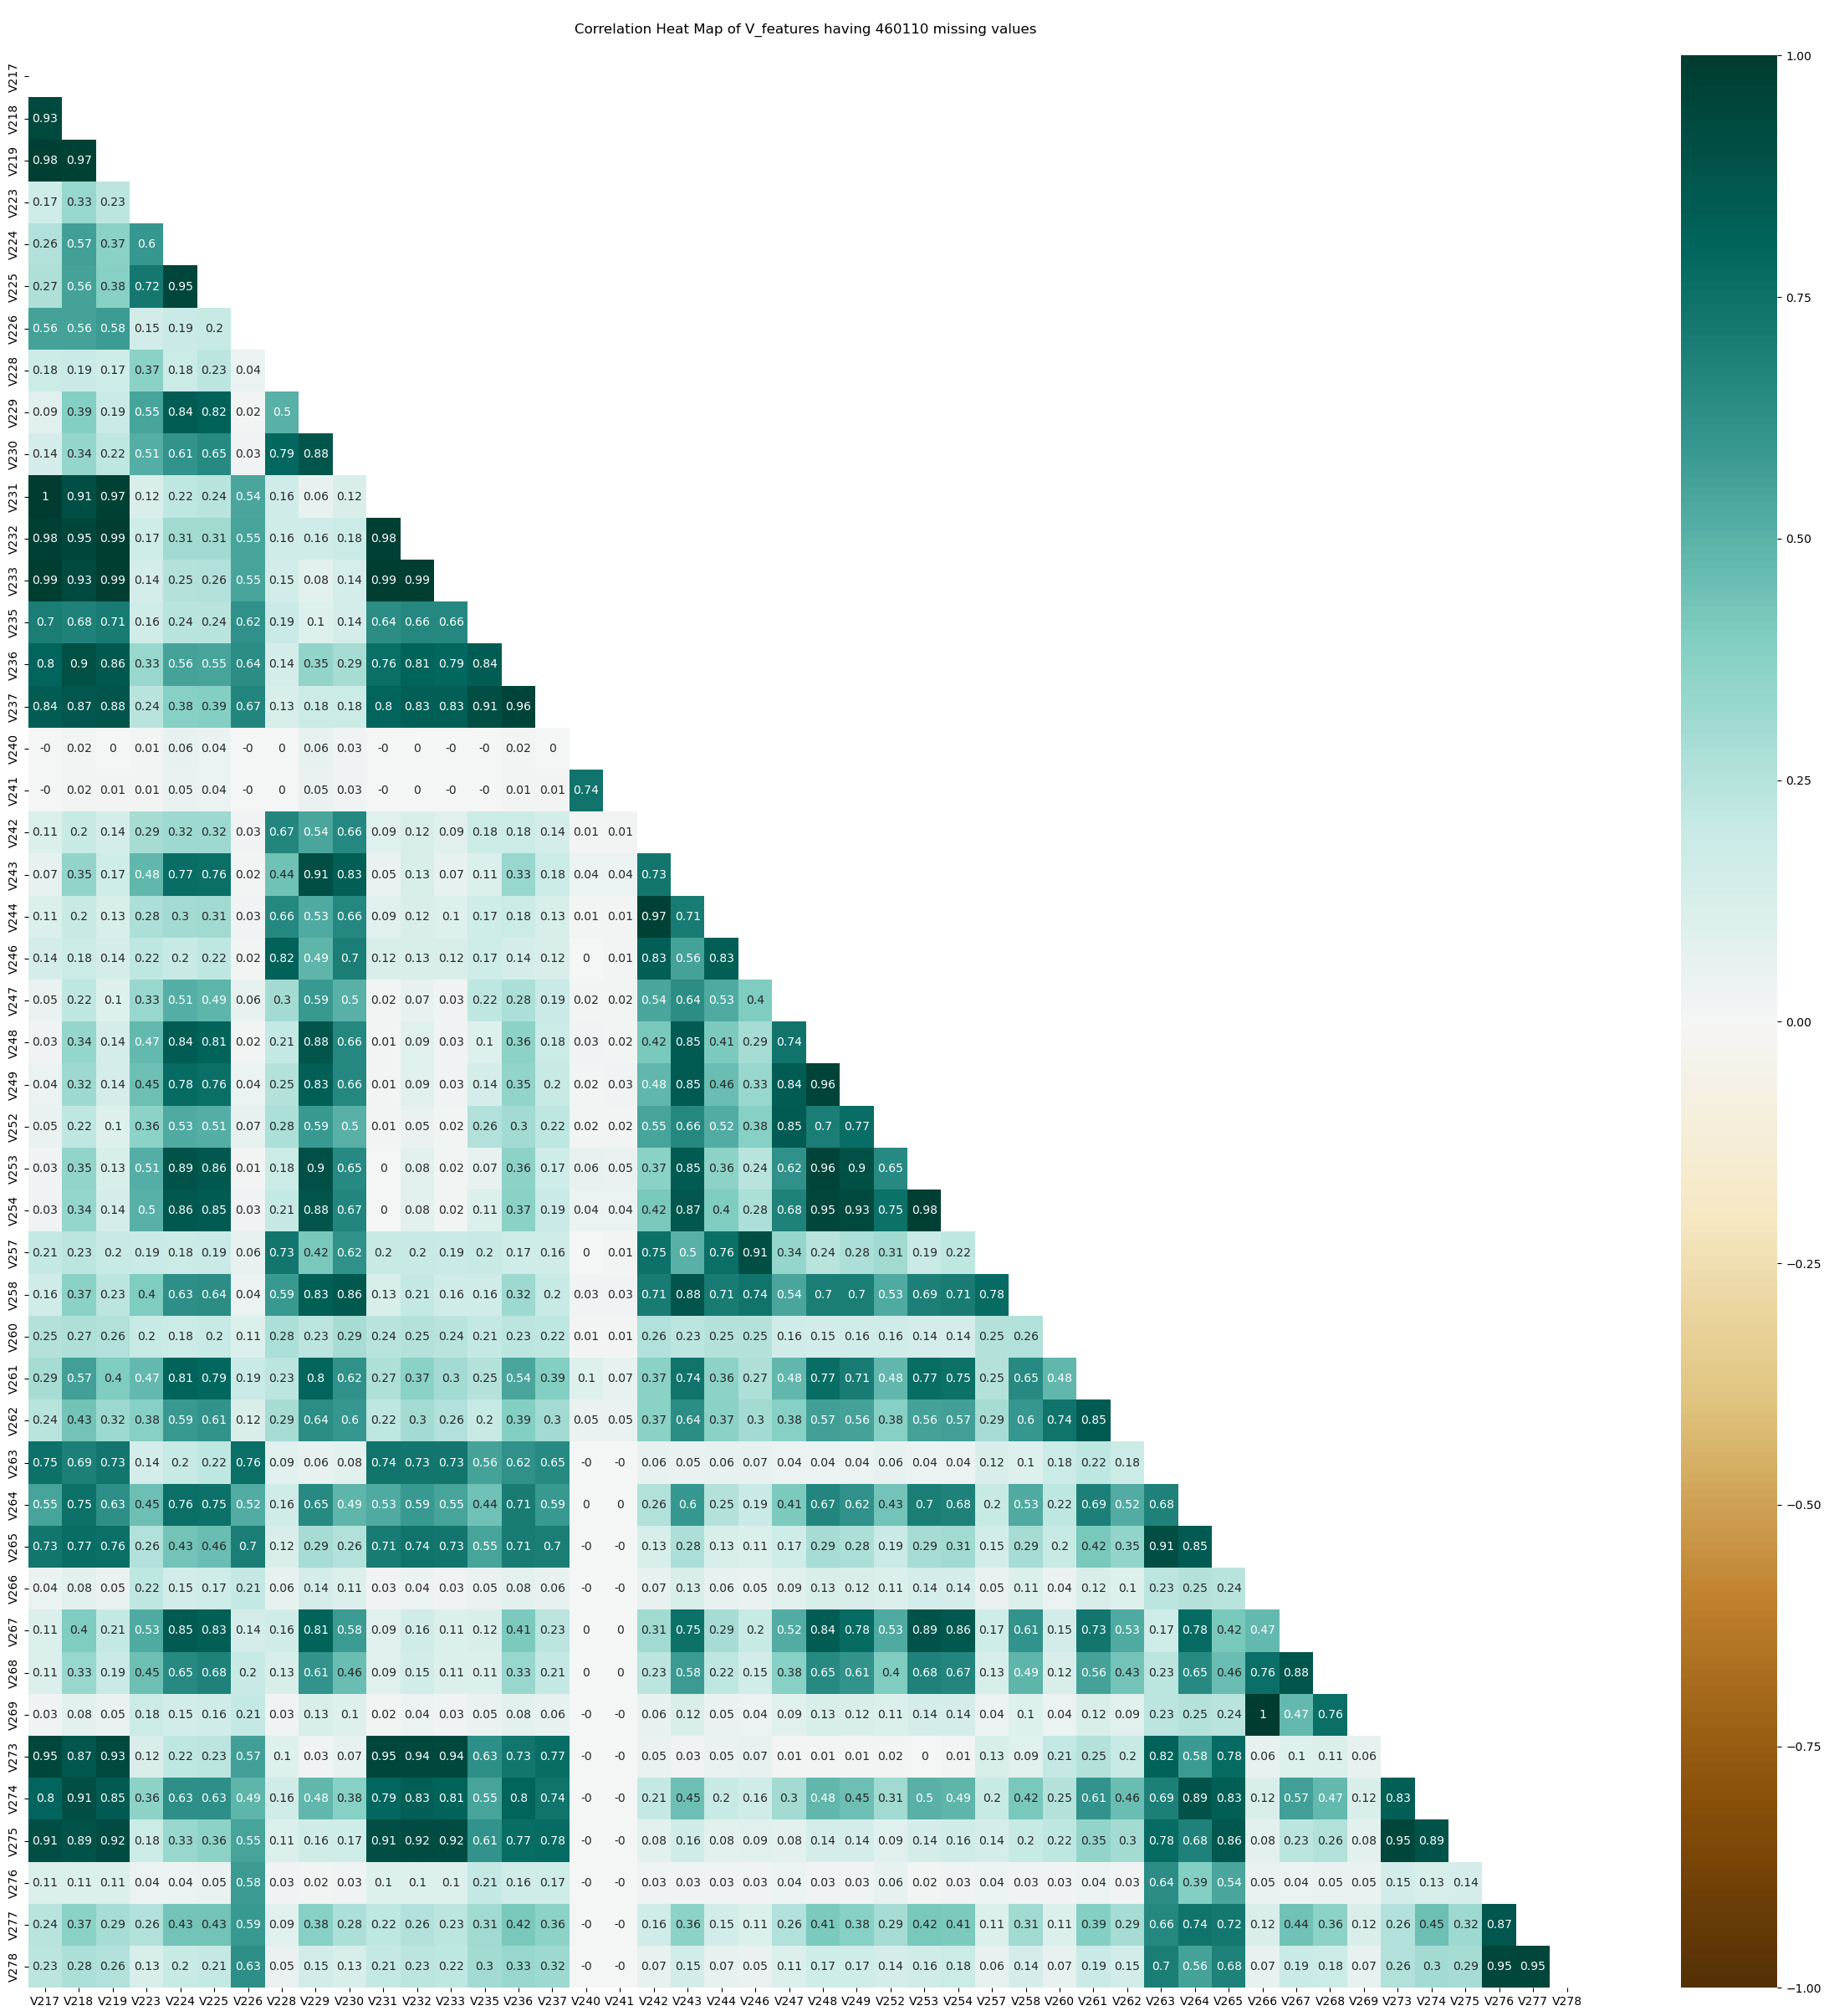

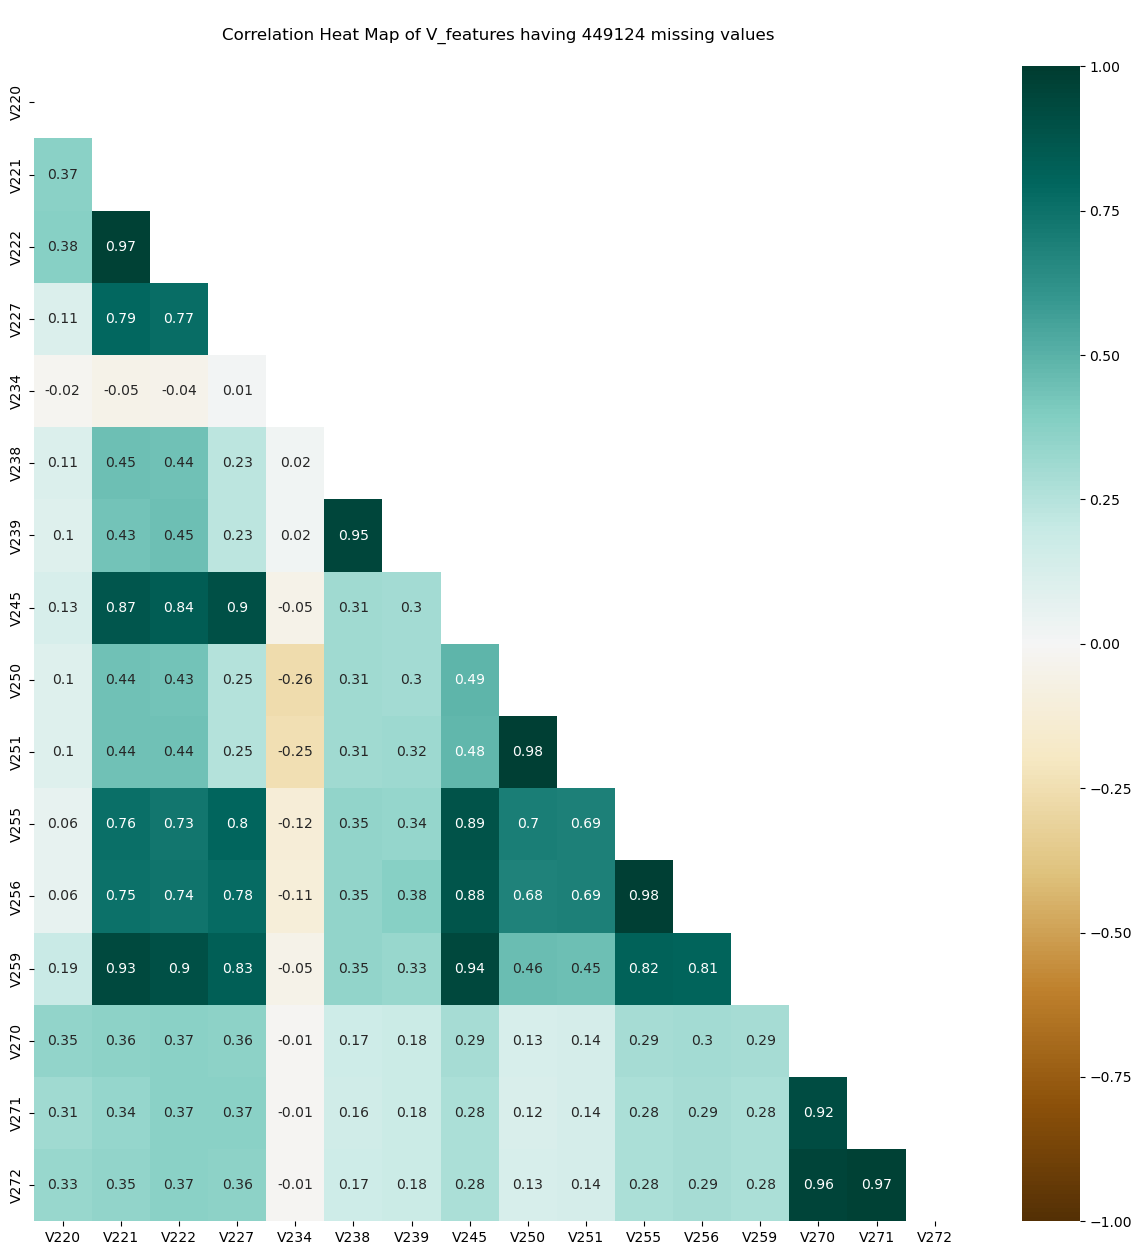

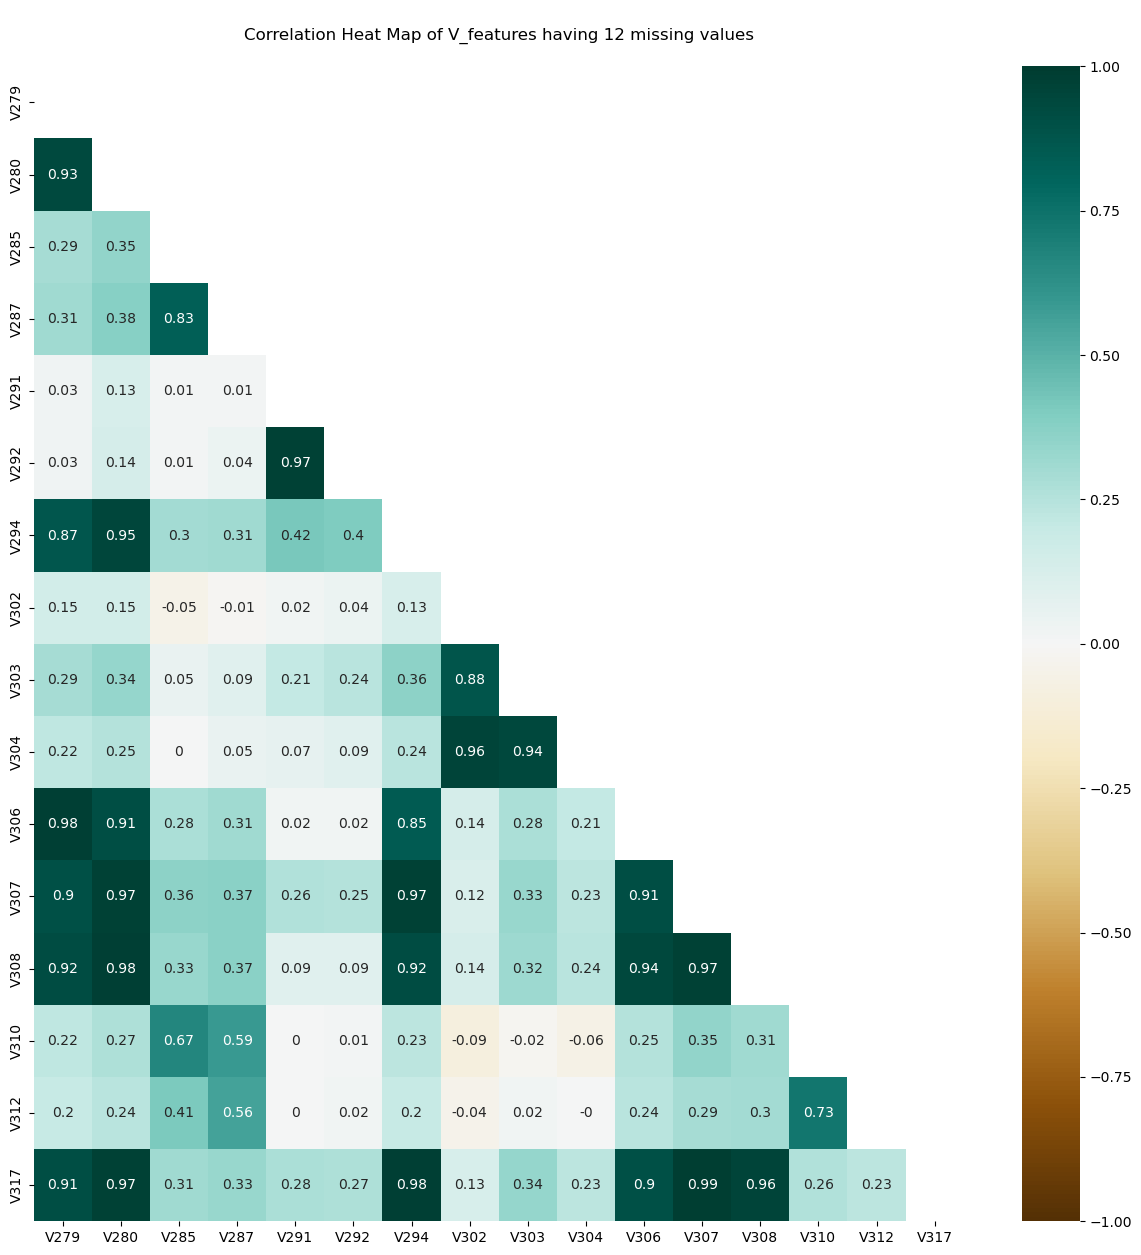

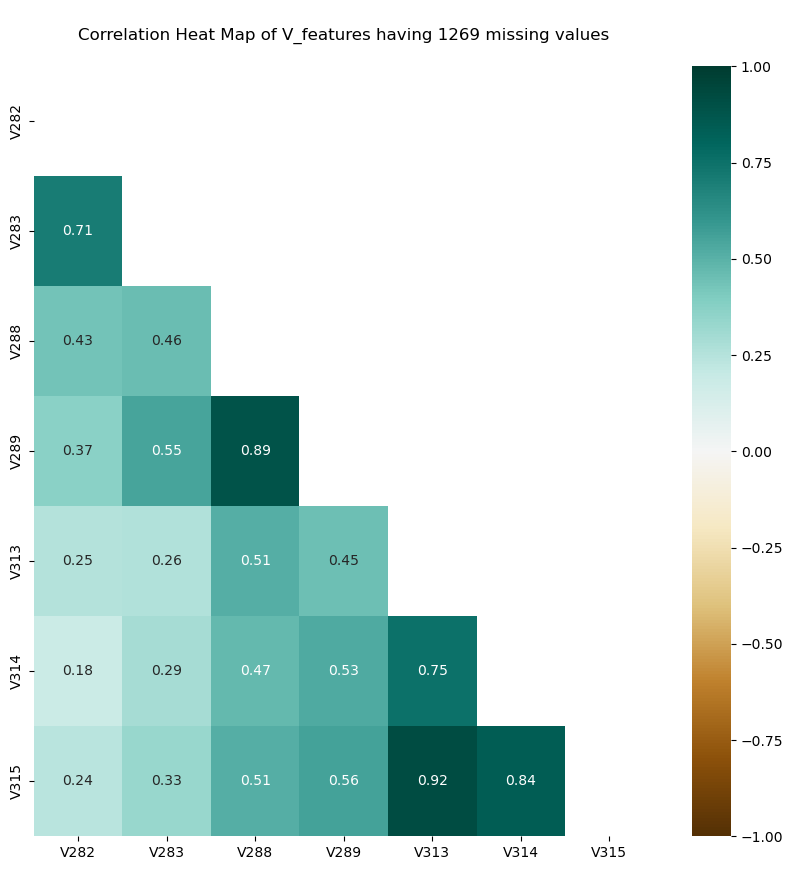

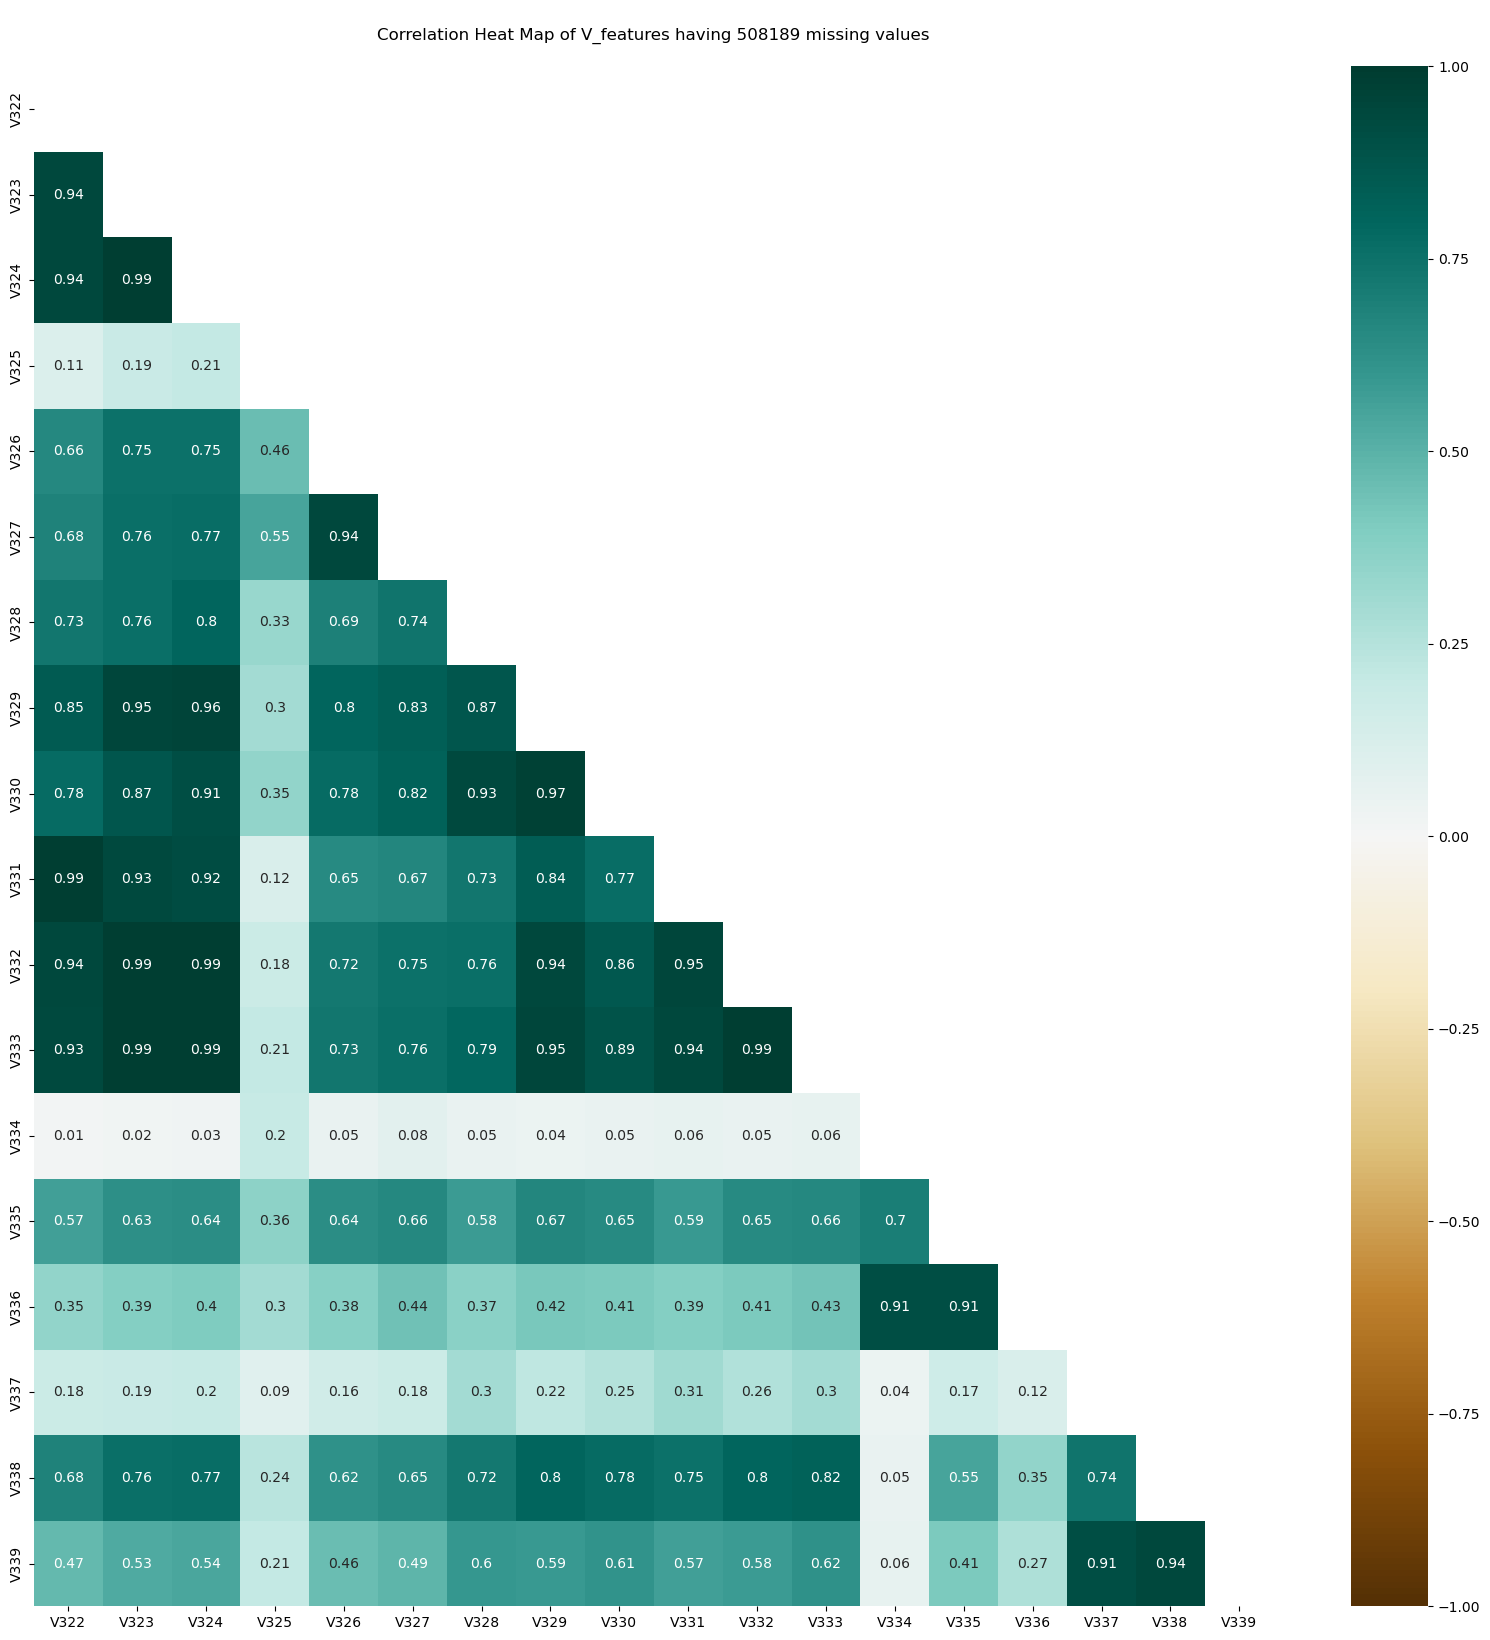

In [44]:
for missing_count, group in v_grps.items():
    
    size = (8,8)
    
    if(len(group)<=12):
        size=(10,10)
    elif(len(group)<=17):
        size=(15,15)
    elif(len(group)<=22):
        size=(20,20)
    elif(len(group)<=27):
        size=(25,25)
    else:
        size=(30,30)
        
    mask = np.triu(np.ones_like(train_data_rdc[group].corr(), dtype=bool))
    plt.figure(figsize=size)
    sns.color_palette("crest", as_cmap=True)
    sns.heatmap(np.round(train_data_rdc[group].corr(), 2), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');
    plt.title('\nCorrelation Heat Map of V_features having {} missing values\n'.format(missing_count))
    plt.show()

In [45]:
groups_with_subgroups = []

for missing_count, grp in v_grps.items():

  children = set()
  parent_dict = {parent:copy.deepcopy(children) for parent in grp}
  corr = train_data_rdc[grp].corr()
  
  for row in corr.iterrows():
    parent = row[0]
    for child,parent_child_corr in row[1].items():  
      if(parent is not child and parent_child_corr>=0.75):
        parent_dict[parent].add(child)
    
  groups_with_subgroups.append(parent_dict)

In [46]:
groups_with_subgroups

[{'V1': set(),
  'V2': {'V3'},
  'V3': {'V2'},
  'V4': {'V5'},
  'V5': {'V4'},
  'V6': {'V7'},
  'V7': {'V6'},
  'V8': {'V9'},
  'V9': {'V8'},
  'V10': {'V11'},
  'V11': {'V10'}},
 {'V12': {'V13'},
  'V13': {'V12'},
  'V15': {'V16', 'V17', 'V18', 'V21', 'V22', 'V31', 'V32', 'V33', 'V34'},
  'V16': {'V15', 'V17', 'V18', 'V21', 'V22', 'V31', 'V32', 'V33', 'V34'},
  'V17': {'V15', 'V16', 'V18', 'V21', 'V22', 'V31', 'V32', 'V33'},
  'V18': {'V15', 'V16', 'V17', 'V21', 'V22', 'V31', 'V32', 'V33'},
  'V19': {'V20'},
  'V20': {'V19'},
  'V21': {'V15', 'V16', 'V17', 'V18', 'V22', 'V31', 'V32', 'V33', 'V34'},
  'V22': {'V15', 'V16', 'V17', 'V18', 'V21', 'V31', 'V32', 'V33'},
  'V29': {'V30'},
  'V30': {'V29'},
  'V31': {'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V32', 'V33', 'V34'},
  'V32': {'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V31', 'V33', 'V34'},
  'V33': {'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V31', 'V32', 'V34'},
  'V34': {'V15', 'V16', 'V21', 'V31', 'V32', 'V33'}},
 {'V35': {'V3

In [47]:
visited = {"V"+str(i):False for i in range(1,340) if "V"+str(i) in train_data.columns}
final_grps = []

for grps in groups_with_subgroups:
  
  grp={}

  for parent,children in grps.items():
  
    if(not visited[parent]):
      
      s = set()
      grp[parent] = copy.deepcopy(s)
      for child in children:
      
        if(not visited[child]):
      
          grp[parent].add(child)
          visited[child]=True
      
      visited[parent]=True
  
  final_grps.append(grp)

In [48]:
final_grps

[{'V1': set(),
  'V2': {'V3'},
  'V4': {'V5'},
  'V6': {'V7'},
  'V8': {'V9'},
  'V10': {'V11'}},
 {'V12': {'V13'},
  'V15': {'V16', 'V17', 'V18', 'V21', 'V22', 'V31', 'V32', 'V33', 'V34'},
  'V19': {'V20'},
  'V29': {'V30'}},
 {'V35': {'V36'},
  'V37': {'V38'},
  'V39': {'V40', 'V42', 'V43', 'V50', 'V51'},
  'V41': set(),
  'V44': {'V45'},
  'V46': {'V47'},
  'V48': {'V49'},
  'V52': set()},
 {'V53': {'V54'},
  'V56': set(),
  'V57': {'V58', 'V59', 'V60', 'V63', 'V64', 'V71', 'V72', 'V73', 'V74'},
  'V61': {'V62'},
  'V69': {'V70'}},
 {'V75': {'V76'},
  'V78': set(),
  'V79': {'V81', 'V84', 'V85', 'V92', 'V93', 'V94'},
  'V80': set(),
  'V82': {'V83'},
  'V87': set(),
  'V90': {'V91'}},
 {'V95': {'V126', 'V127', 'V128', 'V96', 'V97'},
  'V99': {'V100'},
  'V130': set(),
  'V131': set()},
 {'V138': set(),
  'V139': {'V140'},
  'V141': {'V142'},
  'V146': {'V147'},
  'V148': {'V149', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158'},
  'V161': {'V162', 'V163'}},
 {'V143': {'V164', 'V165'}

In [49]:
# Above results give us the subgroups within the groups, now from these subgroups we will choose only that feature which has the most unique value since it holds the maximum information

chosen_v_features = []

for grps in final_grps:
  chosen_v_features+=reduce_group(grps)

Use these ['V1', 'V3', 'V4', 'V6', 'V8', 'V11']
Use these ['V13', 'V17', 'V20', 'V30']
Use these ['V36', 'V37', 'V40', 'V41', 'V44', 'V47', 'V48', 'V52']
Use these ['V54', 'V56', 'V60', 'V62', 'V70']
Use these ['V76', 'V78', 'V81', 'V80', 'V82', 'V87', 'V91']
Use these ['V127', 'V99', 'V130', 'V131']
Use these ['V138', 'V139', 'V142', 'V147', 'V158', 'V162']
Use these ['V165', 'V160', 'V166']
Use these ['V203', 'V207', 'V173', 'V176', 'V183', 'V187', 'V205', 'V216', 'V215']
Use these ['V169', 'V171', 'V174', 'V175', 'V180', 'V185', 'V188', 'V195', 'V198', 'V210', 'V209']
Use these ['V274', 'V223', 'V264', 'V263', 'V230', 'V235', 'V240', 'V241', 'V257', 'V252', 'V258', 'V260', 'V262', 'V265', 'V268', 'V277']
Use these ['V220', 'V221', 'V234', 'V238', 'V250', 'V256', 'V271']
Use these ['V307', 'V285', 'V291', 'V303', 'V310', 'V312']
Use these ['V282', 'V283', 'V289', 'V315', 'V314']
Use these ['V332', 'V325', 'V326', 'V328', 'V336', 'V335', 'V339', 'V338']


In [50]:
chosen_v_features

['V1',
 'V3',
 'V4',
 'V6',
 'V8',
 'V11',
 'V13',
 'V17',
 'V20',
 'V30',
 'V36',
 'V37',
 'V40',
 'V41',
 'V44',
 'V47',
 'V48',
 'V52',
 'V54',
 'V56',
 'V60',
 'V62',
 'V70',
 'V76',
 'V78',
 'V81',
 'V80',
 'V82',
 'V87',
 'V91',
 'V127',
 'V99',
 'V130',
 'V131',
 'V138',
 'V139',
 'V142',
 'V147',
 'V158',
 'V162',
 'V165',
 'V160',
 'V166',
 'V203',
 'V207',
 'V173',
 'V176',
 'V183',
 'V187',
 'V205',
 'V216',
 'V215',
 'V169',
 'V171',
 'V174',
 'V175',
 'V180',
 'V185',
 'V188',
 'V195',
 'V198',
 'V210',
 'V209',
 'V274',
 'V223',
 'V264',
 'V263',
 'V230',
 'V235',
 'V240',
 'V241',
 'V257',
 'V252',
 'V258',
 'V260',
 'V262',
 'V265',
 'V268',
 'V277',
 'V220',
 'V221',
 'V234',
 'V238',
 'V250',
 'V256',
 'V271',
 'V307',
 'V285',
 'V291',
 'V303',
 'V310',
 'V312',
 'V282',
 'V283',
 'V289',
 'V315',
 'V314',
 'V332',
 'V325',
 'V326',
 'V328',
 'V336',
 'V335',
 'V339',
 'V338']

In [51]:
len(chosen_v_features)

105

In [52]:
drop_v_features = [feat for feat in v_features if feat not in chosen_v_features]
train_data_rdc.drop(drop_v_features, axis=1, inplace=True)
test_data_rdc.drop(drop_v_features, axis=1, inplace=True)

In [53]:
train_data_rdc.shape

(590540, 184)

In [54]:
test_data_rdc.shape

(506691, 183)

# Using RandomForestClassifier to Select N Features

## Imputing Missing Values

- missing value ≤10% gunakan simple imputer yaitu median untuk kolom numerik dan modus untuk kolom kategorik
-  missing value >10% dan ≤30% gunakan KNNImputer atau
-  missing value >30% drop kolom

In [72]:
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')
knn_imputer_num = KNNImputer(n_neighbors=5)
knn_imputer_cat =KNNImputer(n_neighbors=5)

In [66]:
train_data_imp = train_data_rdc.copy(deep=True)

In [67]:
test_data_imp = test_data_rdc.copy(deep=True)

In [68]:
catf, numf = cat_num_features(train_data_imp)

In [71]:
train_data_imp.shape

(590540, 184)

In [74]:
# Sampling data to reduce amount of time fitting the kNN imputer
train_imp_sample_10k = train_data_imp.iloc[:10000]
test_imp_sample_10k = test_data_imp.iloc[:10000]

In [75]:
knn_imputer_num.fit?

Signature: knn_imputer_num.fit(X, y=None)
Docstring:
Fit the imputer on X.

Parameters
----------
X : array-like shape of (n_samples, n_features)
    Input data, where `n_samples` is the number of samples and
    `n_features` is the number of features.

y : Ignored
    Not used, present here for API consistency by convention.

Returns
-------
self : object
    The fitted `KNNImputer` class instance.
File:      ~/opt/anaconda3/envs/neural-network-dev/lib/python3.9/site-packages/sklearn/impute/_knn.py
Type:      method

In [59]:
train_data_imp[numf] = median_imputer.fit_transform(train_data_imp[numf])
train_data_imp[numf].isna().sum()

TransactionDT     0
TransactionAmt    0
dist1             0
C1                0
C2                0
C4                0
C5                0
C6                0
C7                0
C9                0
C11               0
C12               0
C13               0
C14               0
D1                0
D2                0
D3                0
D4                0
D5                0
D6                0
D8                0
D9                0
D10               0
D11               0
D12               0
D13               0
D14               0
D15               0
V1                0
V3                0
V4                0
V6                0
V8                0
V11               0
V13               0
V17               0
V20               0
V30               0
V36               0
V37               0
V40               0
V41               0
V44               0
V47               0
V48               0
V52               0
V54               0
V56               0
V60               0
V62               0


In [60]:
test_data_imp[numf] = median_imputer.fit_transform(test_data_imp[numf])
test_data_imp[numf].isna().sum()

TransactionDT     0
TransactionAmt    0
dist1             0
C1                0
C2                0
C4                0
C5                0
C6                0
C7                0
C9                0
C11               0
C12               0
C13               0
C14               0
D1                0
D2                0
D3                0
D4                0
D5                0
D6                0
D8                0
D9                0
D10               0
D11               0
D12               0
D13               0
D14               0
D15               0
V1                0
V3                0
V4                0
V6                0
V8                0
V11               0
V13               0
V17               0
V20               0
V30               0
V36               0
V37               0
V40               0
V41               0
V44               0
V47               0
V48               0
V52               0
V54               0
V56               0
V60               0
V62               0


In [65]:
knn_imputer.fit?

Signature: knn_imputer.fit(X, y=None)
Docstring:
Fit the imputer on X.

Parameters
----------
X : array-like shape of (n_samples, n_features)
    Input data, where `n_samples` is the number of samples and
    `n_features` is the number of features.

y : Ignored
    Not used, present here for API consistency by convention.

Returns
-------
self : object
    The fitted `KNNImputer` class instance.
File:      ~/opt/anaconda3/envs/neural-network-dev/lib/python3.9/site-packages/sklearn/impute/_knn.py
Type:      method

In [61]:
train_data_imp[catf] = mode_imputer.fit_transform(train_data_imp[catf])
test_data_imp[catf] = mode_imputer.fit_transform(test_data_imp[catf])

In [62]:
train_data_imp[catf].isna().sum()

ProductCD        0
card1            0
card2            0
card3            0
card4            0
card5            0
card6            0
addr1            0
addr2            0
P_emaildomain    0
R_emaildomain    0
M1               0
M2               0
M3               0
M4               0
M5               0
M6               0
M7               0
M8               0
M9               0
DeviceType       0
DeviceInfo       0
id_12            0
id_13            0
id_14            0
id_15            0
id_16            0
id_17            0
id_19            0
id_20            0
id_28            0
id_29            0
id_30            0
id_31            0
id_32            0
id_33            0
id_34            0
id_35            0
id_36            0
id_37            0
id_38            0
dtype: int64

In [63]:
test_data_imp[catf].isna().sum()

ProductCD        0
card1            0
card2            0
card3            0
card4            0
card5            0
card6            0
addr1            0
addr2            0
P_emaildomain    0
R_emaildomain    0
M1               0
M2               0
M3               0
M4               0
M5               0
M6               0
M7               0
M8               0
M9               0
DeviceType       0
DeviceInfo       0
id_12            0
id_13            0
id_14            0
id_15            0
id_16            0
id_17            0
id_19            0
id_20            0
id_28            0
id_29            0
id_30            0
id_31            0
id_32            0
id_33            0
id_34            0
id_35            0
id_36            0
id_37            0
id_38            0
dtype: int64

## Categorical Features

In [64]:
catf

['ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'DeviceType',
 'DeviceInfo',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_19',
 'id_20',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38']

In [65]:
train_data_imp.shape

(590540, 184)

In [66]:
test_data_imp.shape

(506691, 183)

In [67]:
train_data_imp.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C9,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V3,V4,V6,V8,V11,V13,V17,V20,V30,V36,V37,V40,V41,V44,V47,V48,V52,V54,V56,V60,V62,V70,V76,V78,V80,V81,V82,V87,V91,V99,V127,V130,V131,V138,V139,V142,V147,V155,V160,V162,V165,V166,V169,V171,V173,V174,V175,V176,V180,V183,V185,V187,V188,V195,V198,V203,V205,V207,V209,V210,V215,V216,V220,V221,V223,V230,V234,V235,V238,V240,V241,V250,V252,V256,V257,V258,V260,V262,V263,V264,V265,V268,V271,V274,V277,V282,V283,V285,V289,V291,V303,V307,V310,V312,V314,V315,V325,V326,V328,V332,V335,V336,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400.0,68.5,W,13926,321.0,150.0,discover,142.0,credit,315.0,87.0,19.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,14.0,97.0,13.0,26.0,10.0,0.0,37.875,0.666666,13.0,13.0,0.0,0.0,0.0,0.0,T,T,T,M2,F,T,F,F,T,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,117.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,266.0,507.0,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
2987001,0,86401.0,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,8.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,0.0,10.0,0.0,37.875,0.666666,0.0,43.0,0.0,0.0,0.0,0.0,T,T,T,M0,T,T,F,F,T,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,266.0,507.0,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
2987002,0,86469.0,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,outlook.com,gmail.com,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,0.0,10.0,0.0,37.875,0.666666,0.0,315.0,0.0,0.0,0.0,315.0,T,T,T,M0,F,F,F,F,F,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,266.0,507.0,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
2987003,0,86499.0,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,8.0,yahoo.com,gmail.com,2.0,5.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,0.0,37.875,0.666666,84.0,43.0,0.0,0.0,0.0,111.0,T,T,T,M0,T,F,F,F,T,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0

In [68]:
test_data_imp.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C9,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V3,V4,V6,V8,V11,V13,V17,V20,V30,V36,V37,V40,V41,V44,V47,V48,V52,V54,V56,V60,V62,V70,V76,V78,V80,V81,V82,V87,V91,V99,V127,V130,V131,V138,V139,V142,V147,V155,V160,V162,V165,V166,V169,V171,V173,V174,V175,V176,V180,V183,V185,V187,V188,V195,V198,V203,V205,V207,V209,V210,V215,V216,V220,V221,V223,V230,V234,V235,V238,V240,V241,V250,V252,V256,V257,V258,V260,V262,V263,V264,V265,V268,V271,V274,V277,V282,V283,V285,V289,V291,V303,V307,V310,V312,V314,V315,V325,V326,V328,V332,V335,V336,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224.0,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,gmail.com,gmail.com,6.0,6.0,0.0,3.0,4.0,0.0,6.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,0.0,37.708332,0.666666,418.0,203.0,0.0,0.0,0.0,409.0,T,T,F,M0,F,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,47.950001,47.950001,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,47.950001,47.950001,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,133189.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,266.0,507.0,Found,Found,Windows 10,chrome 70.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
3663550,18403263.0,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,aol.com,gmail.com,3.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,0.0,37.708332,0.666666,231.0,634.0,0.0,0.0,0.0,634.0,T,F,F,M0,F,F,F,F,T,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,280.000000,280.000000,77.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,280.000000,280.000000,77.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,133189.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,266.0,507.0,Found,Found,Windows 10,chrome 70.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
3663551,18403310.0,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,hotmail.com,gmail.com,2.0,2.0,0.0,0.0,5.0,0.0,4.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,0.0,37.708332,0.666666,136.0,136.0,0.0,0.0,0.0,97.0,T,T,F,M0,F,F,F,F,F,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,3.0,968.000000,705.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,1321.000000,1058.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,133189.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,266.0,507.0,Found,Found,Windows 10,chrome 70.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
3663552,18403310.0,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,gmail.com,gmail.com,5.0,2.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,0.0,37.708332,0.666666,242.0,242.0,0.0,0

In [69]:
train_data_encoded, test_data_encoded = apply_ordinal_encoding(train_data_imp, test_data_imp, catf)

In [70]:
train_data_encoded.shape

(590540, 184)

In [71]:
test_data_encoded.shape

(506691, 183)

In [72]:
train_data_encoded.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C9,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V3,V4,V6,V8,V11,V13,V17,V20,V30,V36,V37,V40,V41,V44,V47,V48,V52,V54,V56,V60,V62,V70,V76,V78,V80,V81,V82,V87,V91,V99,V127,V130,V131,V138,V139,V142,V147,V155,V160,V162,V165,V166,V169,V171,V173,V174,V175,V176,V180,V183,V185,V187,V188,V195,V198,V203,V205,V207,V209,V210,V215,V216,V220,V221,V223,V230,V234,V235,V238,V240,V241,V250,V252,V256,V257,V258,V260,V262,V263,V264,V265,V268,V271,V274,V277,V282,V283,V285,V289,V291,V303,V307,V310,V312,V314,V315,V325,V326,V328,V332,V335,V336,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400.0,68.5,4.0,10095.0,220.0,42.0,1.0,38.0,1.0,166.0,62.0,19.0,16.0,16.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,14.0,97.0,13.0,26.0,10.0,0.0,37.875,0.666666,13.0,13.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,117.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,41.0,6.0,0.0,0.0,59.0,150.0,293.0,0.0,0.0,42.0,47.0,2.0,132.0,3.0,1.0,0.0,1.0,0.0,0.0,1598.0
2987001,0,86401.0,29.0,4.0,1372.0,303.0,42.0,2.0,2.0,1.0,173.0,62.0,8.0,16.0,16.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,0.0,10.0,0.0,37.875,0.666666,0.0,43.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,41.0,6.0,0.0,0.0,59.0,150.0,293.0,0.0,0.0,42.0,47.0,2.0,132.0,3.0,1.0,0.0,1.0,0.0,0.0,1598.0
2987002,0,86469.0,59.0,4.0,2833.0,389.0,42.0,3.0,58.0,2.0,178.0,62.0,287.0,35.0,16.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,0.0,10.0,0.0,37.875,0.666666,0.0,315.0,0.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,41.0,6.0,0.0,0.0,59.0,150.0,293.0,0.0,0.0,42.0,47.0,2.0,132.0,3.0,1.0,0.0,1.0,0.0,0.0,1598.0
2987003,0,86499.0,50.0,4.0,13341.0,466.0,42.0,2.0,14.0,2.0,282.0,62.0,8.0,53.0,16.0,2.0,5.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,0.0,37.875,0.666666,84.0,43.0,0.0,0.0,0.0,111.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,10.0,1758.0,354.0,135.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,

In [73]:
test_data_encoded.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C9,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V3,V4,V6,V8,V11,V13,V17,V20,V30,V36,V37,V40,V41,V44,V47,V48,V52,V54,V56,V60,V62,V70,V76,V78,V80,V81,V82,V87,V91,V99,V127,V130,V131,V138,V139,V142,V147,V155,V160,V162,V165,V166,V169,V171,V173,V174,V175,V176,V180,V183,V185,V187,V188,V195,V198,V203,V205,V207,V209,V210,V215,V216,V220,V221,V223,V230,V234,V235,V238,V240,V241,V250,V252,V256,V257,V258,V260,V262,V263,V264,V265,V268,V271,V274,V277,V282,V283,V285,V289,V291,V303,V307,V310,V312,V314,V315,V325,V326,V328,V332,V335,V336,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224.0,31.95,4.0,7332.0,10.0,42.0,3.0,108.0,2.0,52.0,62.0,1.0,16.0,16.0,6.0,6.0,0.0,3.0,4.0,0.0,6.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,0.0,37.708332,0.666666,418.0,203.0,0.0,0.0,0.0,409.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,47.950001,47.950001,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,47.950001,47.950001,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,133189.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,16.0,6.0,0.0,0.0,59.0,150.0,293.0,0.0,0.0,42.0,NaN,2.0,132.0,3.0,1.0,0.0,1.0,0.0,0.0,1598.0
3663550,18403263.0,49.00,4.0,2549.0,10.0,42.0,3.0,108.0,2.0,151.0,62.0,4.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,0.0,37.708332,0.666666,231.0,634.0,0.0,0.0,0.0,634.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,280.000000,280.000000,77.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,280.000000,280.000000,77.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,133189.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,16.0,6.0,0.0,0.0,59.0,150.0,293.0,0.0,0.0,42.0,NaN,2.0,132.0,3.0,1.0,0.0,1.0,0.0,0.0,1598.0
3663551,18403310.0,171.00,4.0,2695.0,473.0,42.0,3.0,108.0,2.0,280.0,62.0,2635.0,19.0,16.0,2.0,2.0,0.0,0.0,5.0,0.0,4.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,0.0,37.708332,0.666666,136.0,136.0,0.0,0.0,0.0,97.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,3.0,968.000000,705.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,1321.000000,1058.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,133189.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,16.0,6.0,0.0,0.0,59.0,150.0,293.0,0.0,0.0,42.0,NaN,2.0,132.0,3.0,1.0,0.0,1.0,0.0,0.0,1598.0
3663552,18403310.0,284.95,4.0,7789.0,259.0,42.0,3.0,58.0,2.0,79.0,62.0,17.0,16.0,16.0,5.0,2.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,0.0,37.708332,0.666666,242.0,242.0,0.0,0.0,0.0,242.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,

In [74]:
train_data_encoded.isna().sum()

isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card3             0
card4             0
card5             0
card6             0
addr1             0
addr2             0
dist1             0
P_emaildomain     0
R_emaildomain     0
C1                0
C2                0
C4                0
C5                0
C6                0
C7                0
C9                0
C11               0
C12               0
C13               0
C14               0
D1                0
D2                0
D3                0
D4                0
D5                0
D6                0
D8                0
D9                0
D10               0
D11               0
D12               0
D13               0
D14               0
D15               0
M1                0
M2                0
M3                0
M4                0
M5                0
M6                0
M7                0
M8                0
M9                0
V1                0


In [75]:
test_data_encoded[catf].isna().sum()

ProductCD             0
card1              9360
card2               140
card3                46
card4                 0
card5                54
card6                 0
addr1               176
addr2                47
P_emaildomain         2
R_emaildomain         0
M1                    0
M2                    0
M3                    0
M4                    0
M5                    0
M6                    0
M7                    0
M8                    0
M9                    0
DeviceType            0
DeviceInfo        15864
id_12                 0
id_13                 3
id_14                 6
id_15                 0
id_16                 0
id_17                52
id_19              5565
id_20               383
id_28                 0
id_29                 0
id_30             17079
id_31            452825
id_32                13
id_33              1238
id_34                 0
id_35                 0
id_36                 0
id_37                 0
id_38                 0
dtype: int64

In [76]:
# Train and Test Dataset Shape after performing basic Data Cleaning

print("*"*35)
print("\n Train Data Shape : {} \n".format(train_data_encoded.shape))
print("\n Test Data Shape : {} \n".format(test_data_encoded.shape))
print("*"*35)

***********************************

 Train Data Shape : (590540, 184) 


 Test Data Shape : (506691, 183) 

***********************************


In [77]:
# Saving the Cleaned Datasets

train_data_encoded.to_pickle('basic_clean_train.pkl')
test_data_encoded.to_pickle('basic_clean_test.pkl')